# **Importing Libraries**

In [4]:
#Set path to MAIN FOLDER OF EXPERIMENT
#cd /path/to/EXPERIMENT_FOLDER/

In [3]:
#Import Evaluation metrics modules
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc

#Import custom modules
from utils.plot_utils import plot_acc, plot_loss, plot_confusion, plot_pr, plot_roc, plot_bubble
from utils.eval_utils import cal_macro_roc, cal_macro_pr, cal_param_flops
from utils.eval_utils import get_generator, get_prediction
from utils.load_utils import init_models
import utils.plot_utils as plot

#Other modules
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import math

#Supress Tensorflow Unnecessary Warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
#Define Constants
IMAGE_SIZE = (256,256)
TOTAL_CLASSES = 199
BATCH_SIZE = 4
TEXT_MODE = True
FONT_SIZE = 7
DPI=600

#Data paths
VAL_DATA_PATH = 'ds/val/'
TEST_DATA_PATH = 'ds/test/'

#Model paths
DIST_STUDENT_MODEL_PATH = 'models/Distilled_Student_Models/'
NORMAL_STUDENT_MODEL_PATH = 'models/Student_Models/'
TEACHER_MODEL_PATH = 'models/Teacher_Models/'

#Figures paths
DIST_STUDENT_FIG_PATH = 'figures/Distilled_Student_Figures/'
NORMAL_STUDENT_FIG_PATH = 'figures/Student_Figures/'
TEACHER_FIG_PATH = 'figures/Teacher_Figures/'

# **Evaluation of KD-Student Models**

**Initialize Models and Evalutaion Parameters**

In [5]:
#Initialize models
DISTILLED_STUDENT_FILES = ['KD-DenseNet121', 'KD-EfficientNetB0', 'KD-NASNetMobile', 'KD-MobileNetV2', 'KD-Custom-CNN']
NORMAL_STUDENT_FILES = ['DenseNet121', 'EfficientNetB0', 'NASNetMobile', 'MobileNetV2', 'Custom-CNN']
TEACHER_FILES = ['DenseNet201', 'Xception', 'InceptionResNetV2', 'ResNet152V2', 'EfficientNetB7', 'NASNetLarge', 'EnsembleModel']
MODEL_FILES = DISTILLED_STUDENT_FILES + NORMAL_STUDENT_FILES +  TEACHER_FILES
PLOT_MODELS = DISTILLED_STUDENT_FILES + NORMAL_STUDENT_FILES + ['EfficientNetB7']

models = init_models(MODEL_FILES)

#Initialize Evaluation Parameters
MEASURES = ['Accuracy(%)', 'MSLE', 'Precision(%)', 'Recall(%)', 'F1-score(%)', 'PR-AUC', 'ROC-AUC']
val_results = {}
test_results = {}
for m in MEASURES:
    val_results[m] = {}
    test_results[m] = {}

#Initialize predictions
val_preds = {}
test_preds = {}
for file in MODEL_FILES:
    val_preds[file] = {'y_true':None, 'y_prob':None, 'y_soft_prob':None ,'y_pred':None}
    test_preds[file] = {'y_true':None, 'y_prob':None, 'y_soft_prob':None ,'y_pred':None}

[INFO] Loading Model: KD-DenseNet121
[INFO] Loading Model: KD-EfficientNetB0
[INFO] Loading Model: KD-NASNetMobile
[INFO] Loading Model: KD-MobileNetV2
[INFO] Loading Model: KD-Custom-CNN
[INFO] Loading Model: DenseNet121
[INFO] Loading Model: EfficientNetB0
[INFO] Loading Model: NASNetMobile
[INFO] Loading Model: MobileNetV2
[INFO] Loading Model: Custom-CNN
[INFO] Loading Model: DenseNet201
[INFO] Loading Model: Xception
[INFO] Loading Model: InceptionResNetV2
[INFO] Loading Model: ResNet152V2
[INFO] Loading Model: EfficientNetB7
[INFO] Loading Model: NASNetLarge
[INFO] Loading Model: EnsembleModel


**Get Predictions**

In [6]:
for file in MODEL_FILES:
    model = models[file]['model']
    #Get Generators and no. of samples in Validation and Test Set
    validation_generator, nb_validation_samples = get_generator(VAL_DATA_PATH, 'sparse', models[file]['preprocess_func'], rescale=models[file]['rescale'])
    test_generator, nb_test_samples = get_generator(TEST_DATA_PATH, 'sparse', models[file]['preprocess_func'], rescale=models[file]['rescale'])

    print('\n[INFO] Getting Predictions for ' + file + ' on Validation and Test Set')
    #Get Validation Predictions
    y_true, y_prob, y_soft_prob, y_pred = get_prediction(model, validation_generator, nb_validation_samples)
    val_preds[file]['y_true'] = y_true
    val_preds[file]['y_prob'] = y_prob
    val_preds[file]['y_soft_prob'] = y_soft_prob
    val_preds[file]['y_pred'] = y_pred

    #Get Test Predictions
    y_true, y_prob, y_soft_prob, y_pred = get_prediction(model, test_generator, nb_test_samples)
    test_preds[file]['y_true'] = y_true
    test_preds[file]['y_prob'] = y_prob
    test_preds[file]['y_soft_prob'] = y_soft_prob
    test_preds[file]['y_pred'] = y_pred

Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for KD-DenseNet121 on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for KD-EfficientNetB0 on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for KD-NASNetMobile on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for KD-MobileNetV2 on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for KD-Custom-CNN on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for DenseNet121 on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for EfficientNetB0 on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for NASNetMobile on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for MobileNetV2 on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for Custom-CNN on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for DenseNet201 on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for Xception on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for InceptionResNetV2 on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for ResNet152V2 on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for EfficientNetB7 on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for NASNetLarge on Validation and Test Set



Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.

[INFO] Getting Predictions for EnsembleModel on Validation and Test Set


**Evaluation on Validation set**

In [11]:
for model_name in MODEL_FILES:
    print('[INFO] Evaluating ' + model_name + ' on Validation Set')
    y_true, y_pred, y_prob, y_soft_prob = (val_preds[model_name]['y_true'], val_preds[model_name]['y_pred'], 
                                           val_preds[model_name]['y_prob'], val_preds[model_name]['y_soft_prob'])

    #Update Accuracy, MSE and MSLE
    val_results['Accuracy(%)'][model_name] = '{0:.4f}'.format(accuracy_score(y_true, y_pred)*100)
    val_results['MSLE'][model_name] = '{0:.4f}'.format(mean_squared_log_error(y_true, y_pred))

    #Update Macro Precision, Macro Recall and Macro Fscore 
    avg_pre, avg_rec, avg_fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
    val_results['Precision(%)'][model_name] = '{0:.4f}'.format(avg_pre*100)
    val_results['Recall(%)'][model_name] = '{0:.4f}'.format(avg_rec*100)
    val_results['F1-score(%)'][model_name] = '{0:.4f}'.format(avg_fscore*100)

    #Update Macro ROC-AUC and Macro PR-AUC
    y_true = to_categorical(y_true)
    macro_fpr, macro_tpr = cal_macro_roc(y_true, y_soft_prob, TOTAL_CLASSES)
    macro_rec, macro_pre = cal_macro_pr(y_true, y_soft_prob, TOTAL_CLASSES)
    ROC_AUC = auc(macro_fpr, macro_tpr)
    PR_AUC = auc(macro_rec, macro_pre)
    val_results['ROC-AUC'][model_name] = '{0:.4f}'.format(ROC_AUC)
    val_results['PR-AUC'][model_name] = '{0:.4f}'.format(PR_AUC)

[INFO] Evaluating KD-DenseNet121 on Validation Set
[INFO] Evaluating KD-EfficientNetB0 on Validation Set
[INFO] Evaluating KD-NASNetMobile on Validation Set
[INFO] Evaluating KD-MobileNetV2 on Validation Set
[INFO] Evaluating KD-Custom-CNN on Validation Set
[INFO] Evaluating DenseNet121 on Validation Set
[INFO] Evaluating EfficientNetB0 on Validation Set
[INFO] Evaluating NASNetMobile on Validation Set
[INFO] Evaluating MobileNetV2 on Validation Set
[INFO] Evaluating Custom-CNN on Validation Set
[INFO] Evaluating DenseNet201 on Validation Set
[INFO] Evaluating Xception on Validation Set
[INFO] Evaluating InceptionResNetV2 on Validation Set
[INFO] Evaluating ResNet152V2 on Validation Set
[INFO] Evaluating EfficientNetB7 on Validation Set
[INFO] Evaluating NASNetLarge on Validation Set
[INFO] Evaluating EnsembleModel on Validation Set


In [12]:
#See results
print("\t\t\tEVALUATION RESULTS OF ALL MODELS ON VALIDATION SET")
print("\t\t\t--------------------------------------------------")
df_val = pd.DataFrame(val_results)
df_val

			EVALUATION RESULTS OF ALL MODELS ON VALIDATION SET
			--------------------------------------------------


Accuracy(%)    MSLE Precision(%)  ... F1-score(%)  PR-AUC ROC-AUC
KD-DenseNet121        91.2060  0.1323      93.2018  ...     91.0699  0.8988  0.9987
KD-EfficientNetB0     91.1223  0.1507      92.8813  ...     90.8869  0.8991  0.9982
KD-NASNetMobile       84.6734  0.2425      89.0472  ...     84.6995  0.8722  0.9944
KD-MobileNetV2        87.5209  0.2203      90.6871  ...     87.2753  0.8899  0.9986
KD-Custom-CNN         68.2580  0.5429      76.5443  ...     67.7202  0.7552  0.9891
DenseNet121           84.5896  0.2368      87.6742  ...     83.7968  0.8664  0.9988
EfficientNetB0        73.8693  0.3873      78.0567  ...     72.3284  0.8124  0.9961
NASNetMobile          72.1943  0.4322      75.7970  ...     70.2589  0.7973  0.9966
MobileNetV2           80.9045  0.2751      85.9360  ...     80.4517  0.8630  0.9989
Custom-CNN            52.0938  0.7346      57.6514  ...     50.0549  0.5895  0.9759
DenseNet201           90.9548  0.1025      92.9360  ...     90.6326  0.8948  0.9994
Xception              86.2647  0.2356      89.0092  ...     85.9274  0.8734  0.9988
InceptionResNetV2     86.5997  0.2107      89.5055  ...     85.9133  0.8800  0.9979
ResNet152V2           84.0034  0.2291      87.3226  ...     83.7818  0.8544  0.9973
EfficientNetB7        92.2948  0.1553      94.0689  ...     92.1262  0.9102  0.9998
NASNetLarge           86.7672  0.1506      89.3156  ...     86.3704  0.8784  0.9983
EnsembleModel         93.4673  0.1128      94.9797  ...     93.2125  0.9088  0.9998

[17 rows x 7 columns]

**Evaluation on Testing Set**

In [13]:
for model_name in MODEL_FILES:
    print('[INFO] Evaluating ' + model_name + ' on Test Set')
    y_true, y_pred, y_prob, y_soft_prob = (test_preds[model_name]['y_true'], test_preds[model_name]['y_pred'], 
                                           test_preds[model_name]['y_prob'], test_preds[model_name]['y_soft_prob'])

    #Update Accuracy and MSLE
    test_results['Accuracy(%)'][model_name] = '{0:.4f}'.format(accuracy_score(y_true, y_pred)*100)
    test_results['MSLE'][model_name] = '{0:.4f}'.format(mean_squared_log_error(y_true, y_pred))

    #Update Macro Precision, Macro Recall and Macro Fscore 
    avg_pre, avg_rec, avg_fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
    test_results['Precision(%)'][model_name] = '{0:.4f}'.format(avg_pre*100)
    test_results['Recall(%)'][model_name] = '{0:.4f}'.format(avg_rec*100)
    test_results['F1-score(%)'][model_name] = '{0:.4f}'.format(avg_fscore*100)

    #Update Macro ROC-AUC and Macro PR-AUC
    y_true = to_categorical(y_true)
    macro_fpr, macro_tpr = cal_macro_roc(y_true, y_soft_prob, TOTAL_CLASSES)
    macro_rec, macro_pre = cal_macro_pr(y_true, y_soft_prob, TOTAL_CLASSES)
    ROC_AUC = auc(macro_fpr, macro_tpr)
    PR_AUC = auc(macro_rec, macro_pre)
    test_results['ROC-AUC'][model_name] = '{0:.4f}'.format(ROC_AUC)
    test_results['PR-AUC'][model_name] = '{0:.4f}'.format(PR_AUC)

[INFO] Evaluating KD-DenseNet121 on Test Set
[INFO] Evaluating KD-EfficientNetB0 on Test Set
[INFO] Evaluating KD-NASNetMobile on Test Set
[INFO] Evaluating KD-MobileNetV2 on Test Set
[INFO] Evaluating KD-Custom-CNN on Test Set
[INFO] Evaluating DenseNet121 on Test Set
[INFO] Evaluating EfficientNetB0 on Test Set
[INFO] Evaluating NASNetMobile on Test Set
[INFO] Evaluating MobileNetV2 on Test Set
[INFO] Evaluating Custom-CNN on Test Set
[INFO] Evaluating DenseNet201 on Test Set
[INFO] Evaluating Xception on Test Set
[INFO] Evaluating InceptionResNetV2 on Test Set
[INFO] Evaluating ResNet152V2 on Test Set
[INFO] Evaluating EfficientNetB7 on Test Set
[INFO] Evaluating NASNetLarge on Test Set
[INFO] Evaluating EnsembleModel on Test Set


In [14]:
#See results
print("\t\t\tEVALUATION RESULTS OF ALL MODELS ON TEST SET")
print("\t\t\t--------------------------------------------")
df_test = pd.DataFrame(test_results)
df_test

			EVALUATION RESULTS OF ALL MODELS ON TEST SET
			--------------------------------------------


Accuracy(%)    MSLE Precision(%)  ... F1-score(%)  PR-AUC ROC-AUC
KD-DenseNet121        89.0704  0.1235      91.2578  ...     88.2728  0.8702  0.9989
KD-EfficientNetB0     90.3266  0.1243      91.9024  ...     89.7405  0.8757  0.9982
KD-NASNetMobile       83.7940  0.2179      88.8758  ...     83.5623  0.8388  0.9920
KD-MobileNetV2        86.3065  0.1377      88.7621  ...     85.2333  0.8619  0.9988
KD-Custom-CNN         64.6985  0.5221      70.4093  ...     62.8871  0.7271  0.9843
DenseNet121           83.2915  0.1397      84.8509  ...     81.8289  0.8510  0.9992
EfficientNetB0        70.7286  0.3856      74.5843  ...     68.0825  0.7923  0.9973
NASNetMobile          69.8492  0.4563      72.9724  ...     67.4881  0.7794  0.9966
MobileNetV2           77.1357  0.2953      80.7057  ...     75.5435  0.8432  0.9991
Custom-CNN            52.2613  0.8128      54.5810  ...     48.7855  0.5777  0.9782
DenseNet201           89.5729  0.1062      92.5489  ...     88.9640  0.8774  0.9997
Xception              84.1709  0.1896      86.9008  ...     83.0912  0.8543  0.9987
InceptionResNetV2     86.5578  0.1644      88.2348  ...     85.4701  0.8562  0.9978
ResNet152V2           82.5377  0.2082      86.0509  ...     81.2675  0.8408  0.9985
EfficientNetB7        92.0854  0.0759      94.0727  ...     91.8036  0.8867  0.9998
NASNetLarge           86.9347  0.1560      90.7061  ...     86.5689  0.8704  0.9992
EnsembleModel         92.4623  0.0548      93.3186  ...     91.8215  0.8877  0.9999

[17 rows x 7 columns]

In [15]:
if not os.path.exists('results/'):
	os.makedirs('results/')

# Save all predictions and results
with open('results/test_results.pickle', 'wb') as f:
   pickle.dump(test_results, f)

with open('results/val_results.pickle', 'wb') as f:
   pickle.dump(val_results, f)

with open('results/test_preds.pickle', 'wb') as f:
   pickle.dump(test_preds, f)

with open('results/val_preds.pickle', 'wb') as f:
   pickle.dump(val_preds, f)

print("[INFO] RESULTS AND PREDICTIONS SAVED")

[INFO] RESULTS AND PREDICTIONS SAVED


# **Plotting Curves**

In [16]:
#Set plot initials
plot.MODELS_PATH = DIST_STUDENT_MODEL_PATH
plot.SAVE_PATH = DIST_STUDENT_FIG_PATH
plot.TOTAL_CLASSES = TOTAL_CLASSES
plot.TEXT_MODE = TEXT_MODE
plot.FONT_SIZE = FONT_SIZE
plot.DPI = DPI

#Set results and preds
plot.test_results = test_results
plot.val_results = val_results
plot.test_preds = test_preds
plot.val_preds = val_preds
plot.models = models

plot.update_env()
print("[INFO] PLOT ENVIRONMENT VARIABLES UPDATED")

[INFO] PLOT ENVIRONMENT VARIABLES UPDATED


**Plot Accuracy Curves**

[INFO] ACCURACY CURVES FOR KD-STUDENTS


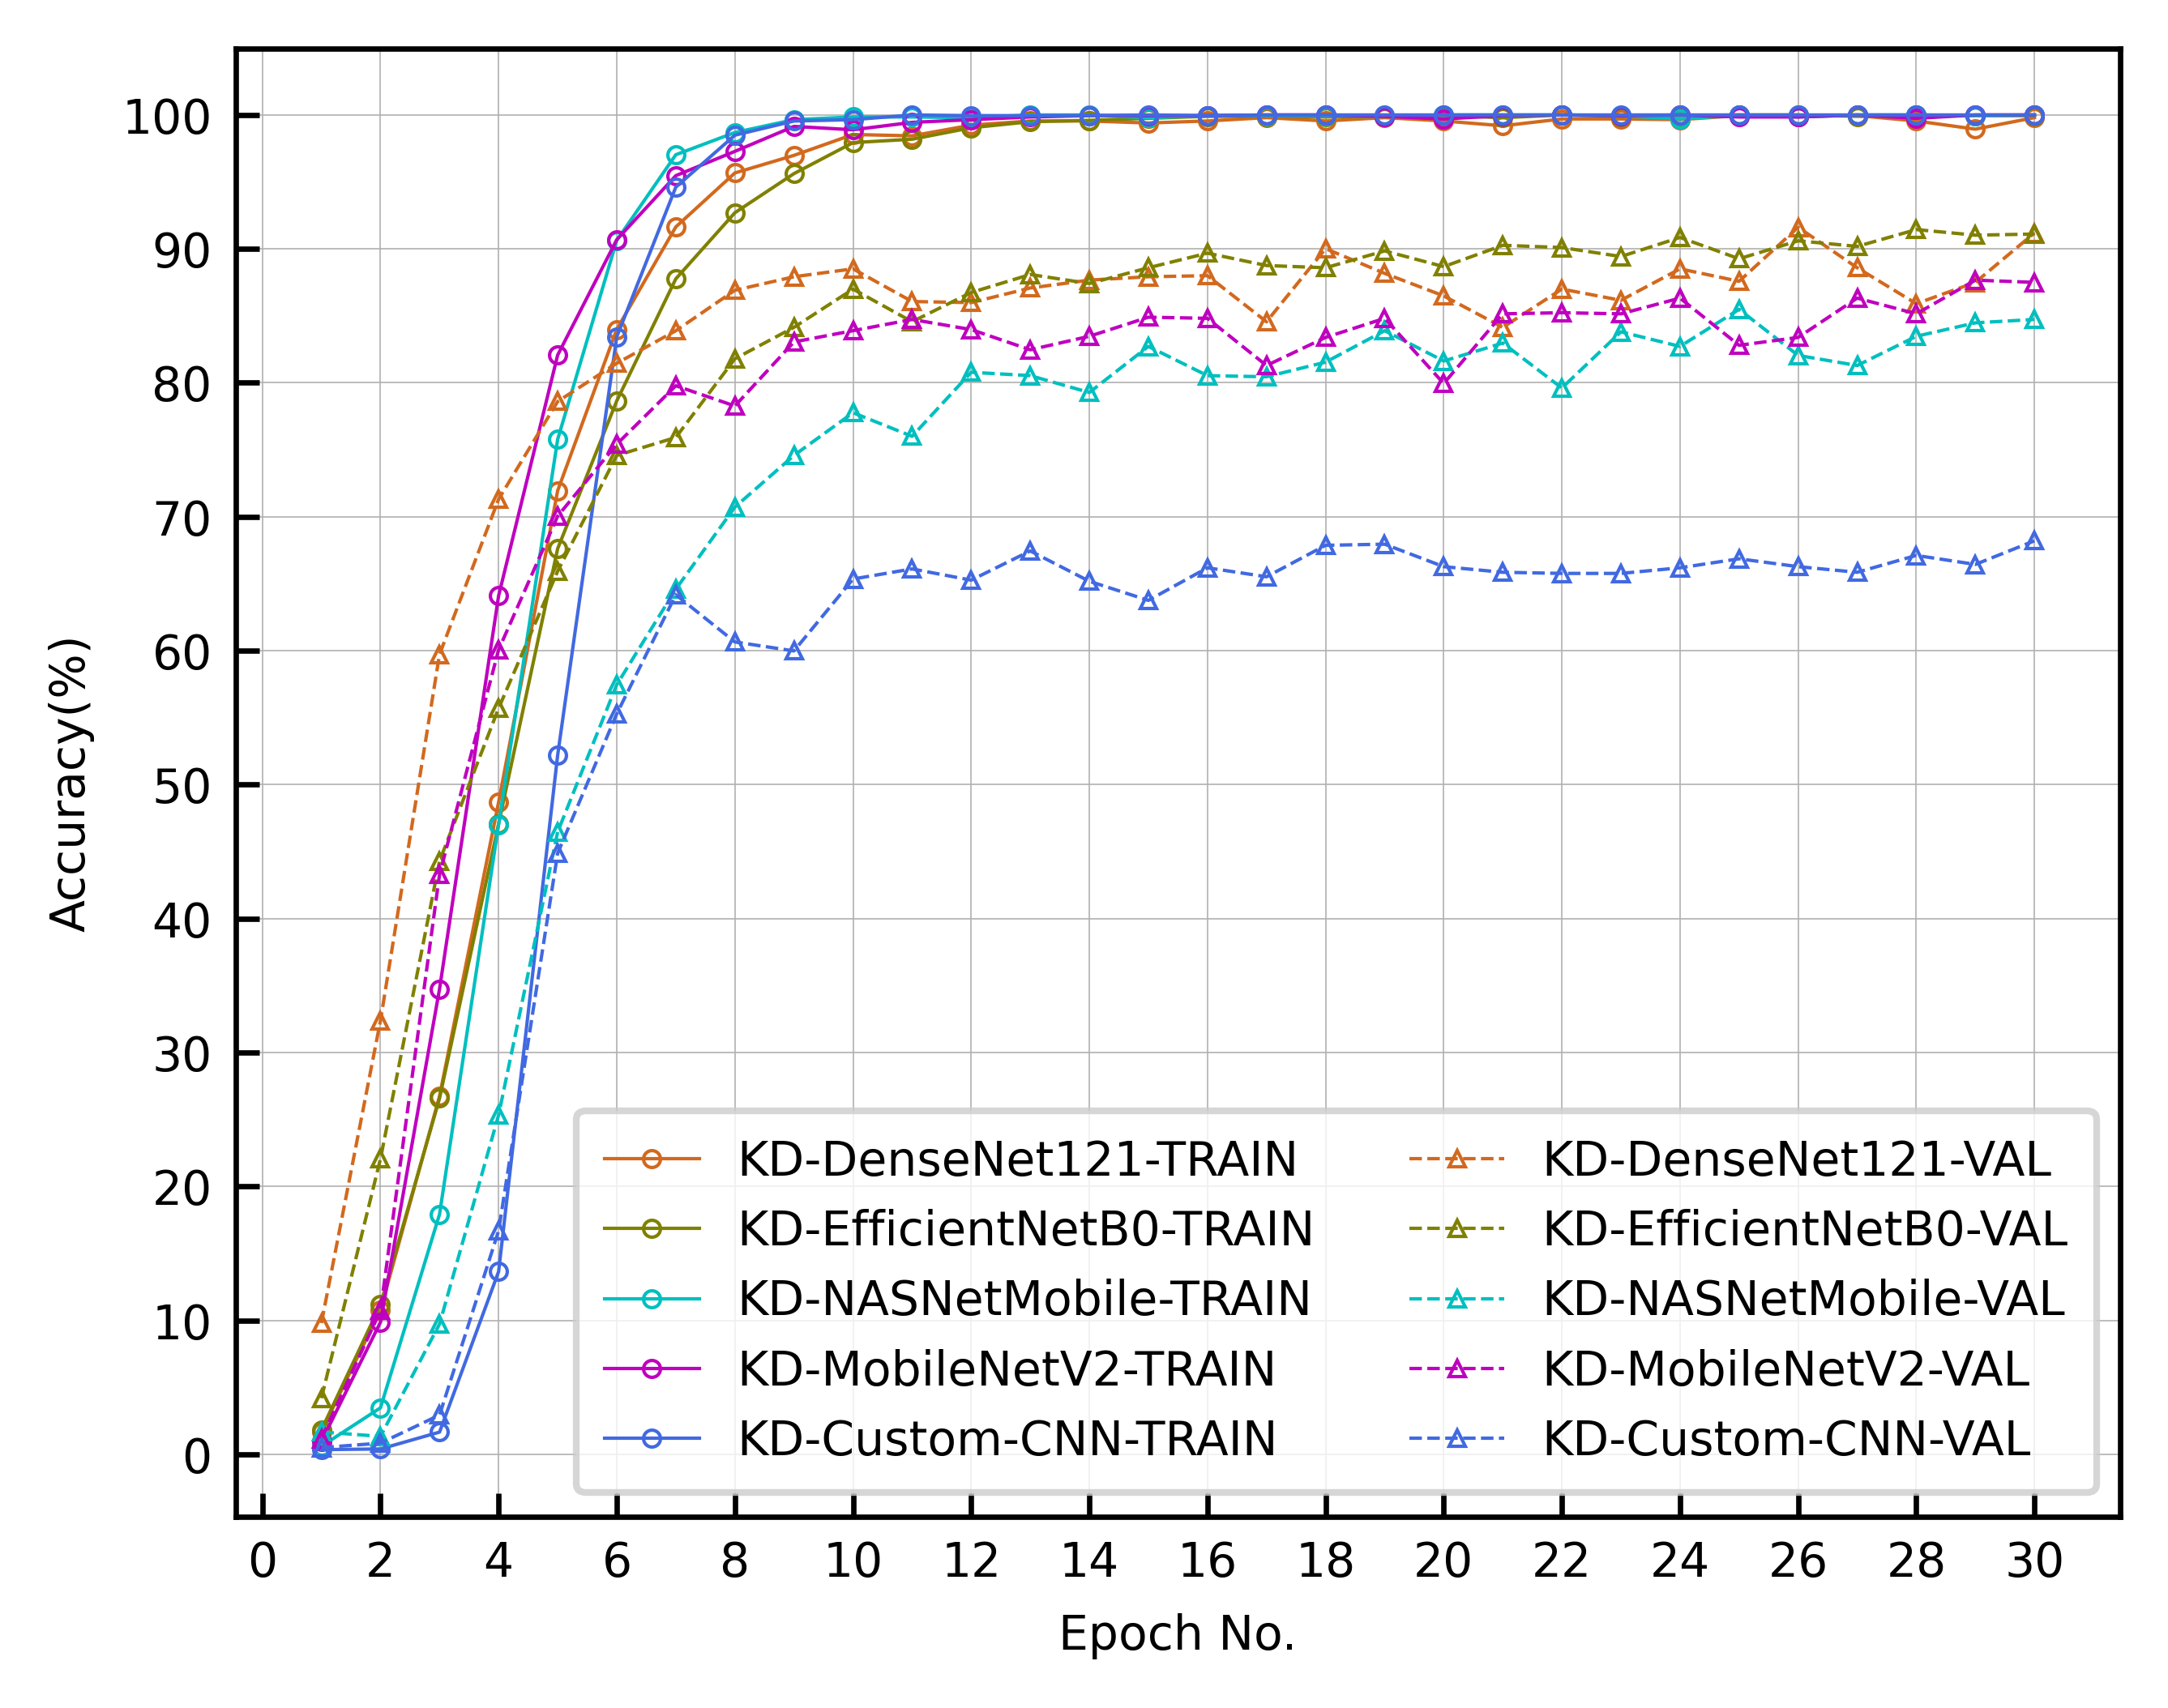

In [17]:
print("[INFO] ACCURACY CURVES FOR KD-STUDENTS")
plot_acc(DISTILLED_STUDENT_FILES, kd=True)

**Plot Loss Curves**

[INFO] LOSS CURVES FOR KD-STUDENTS


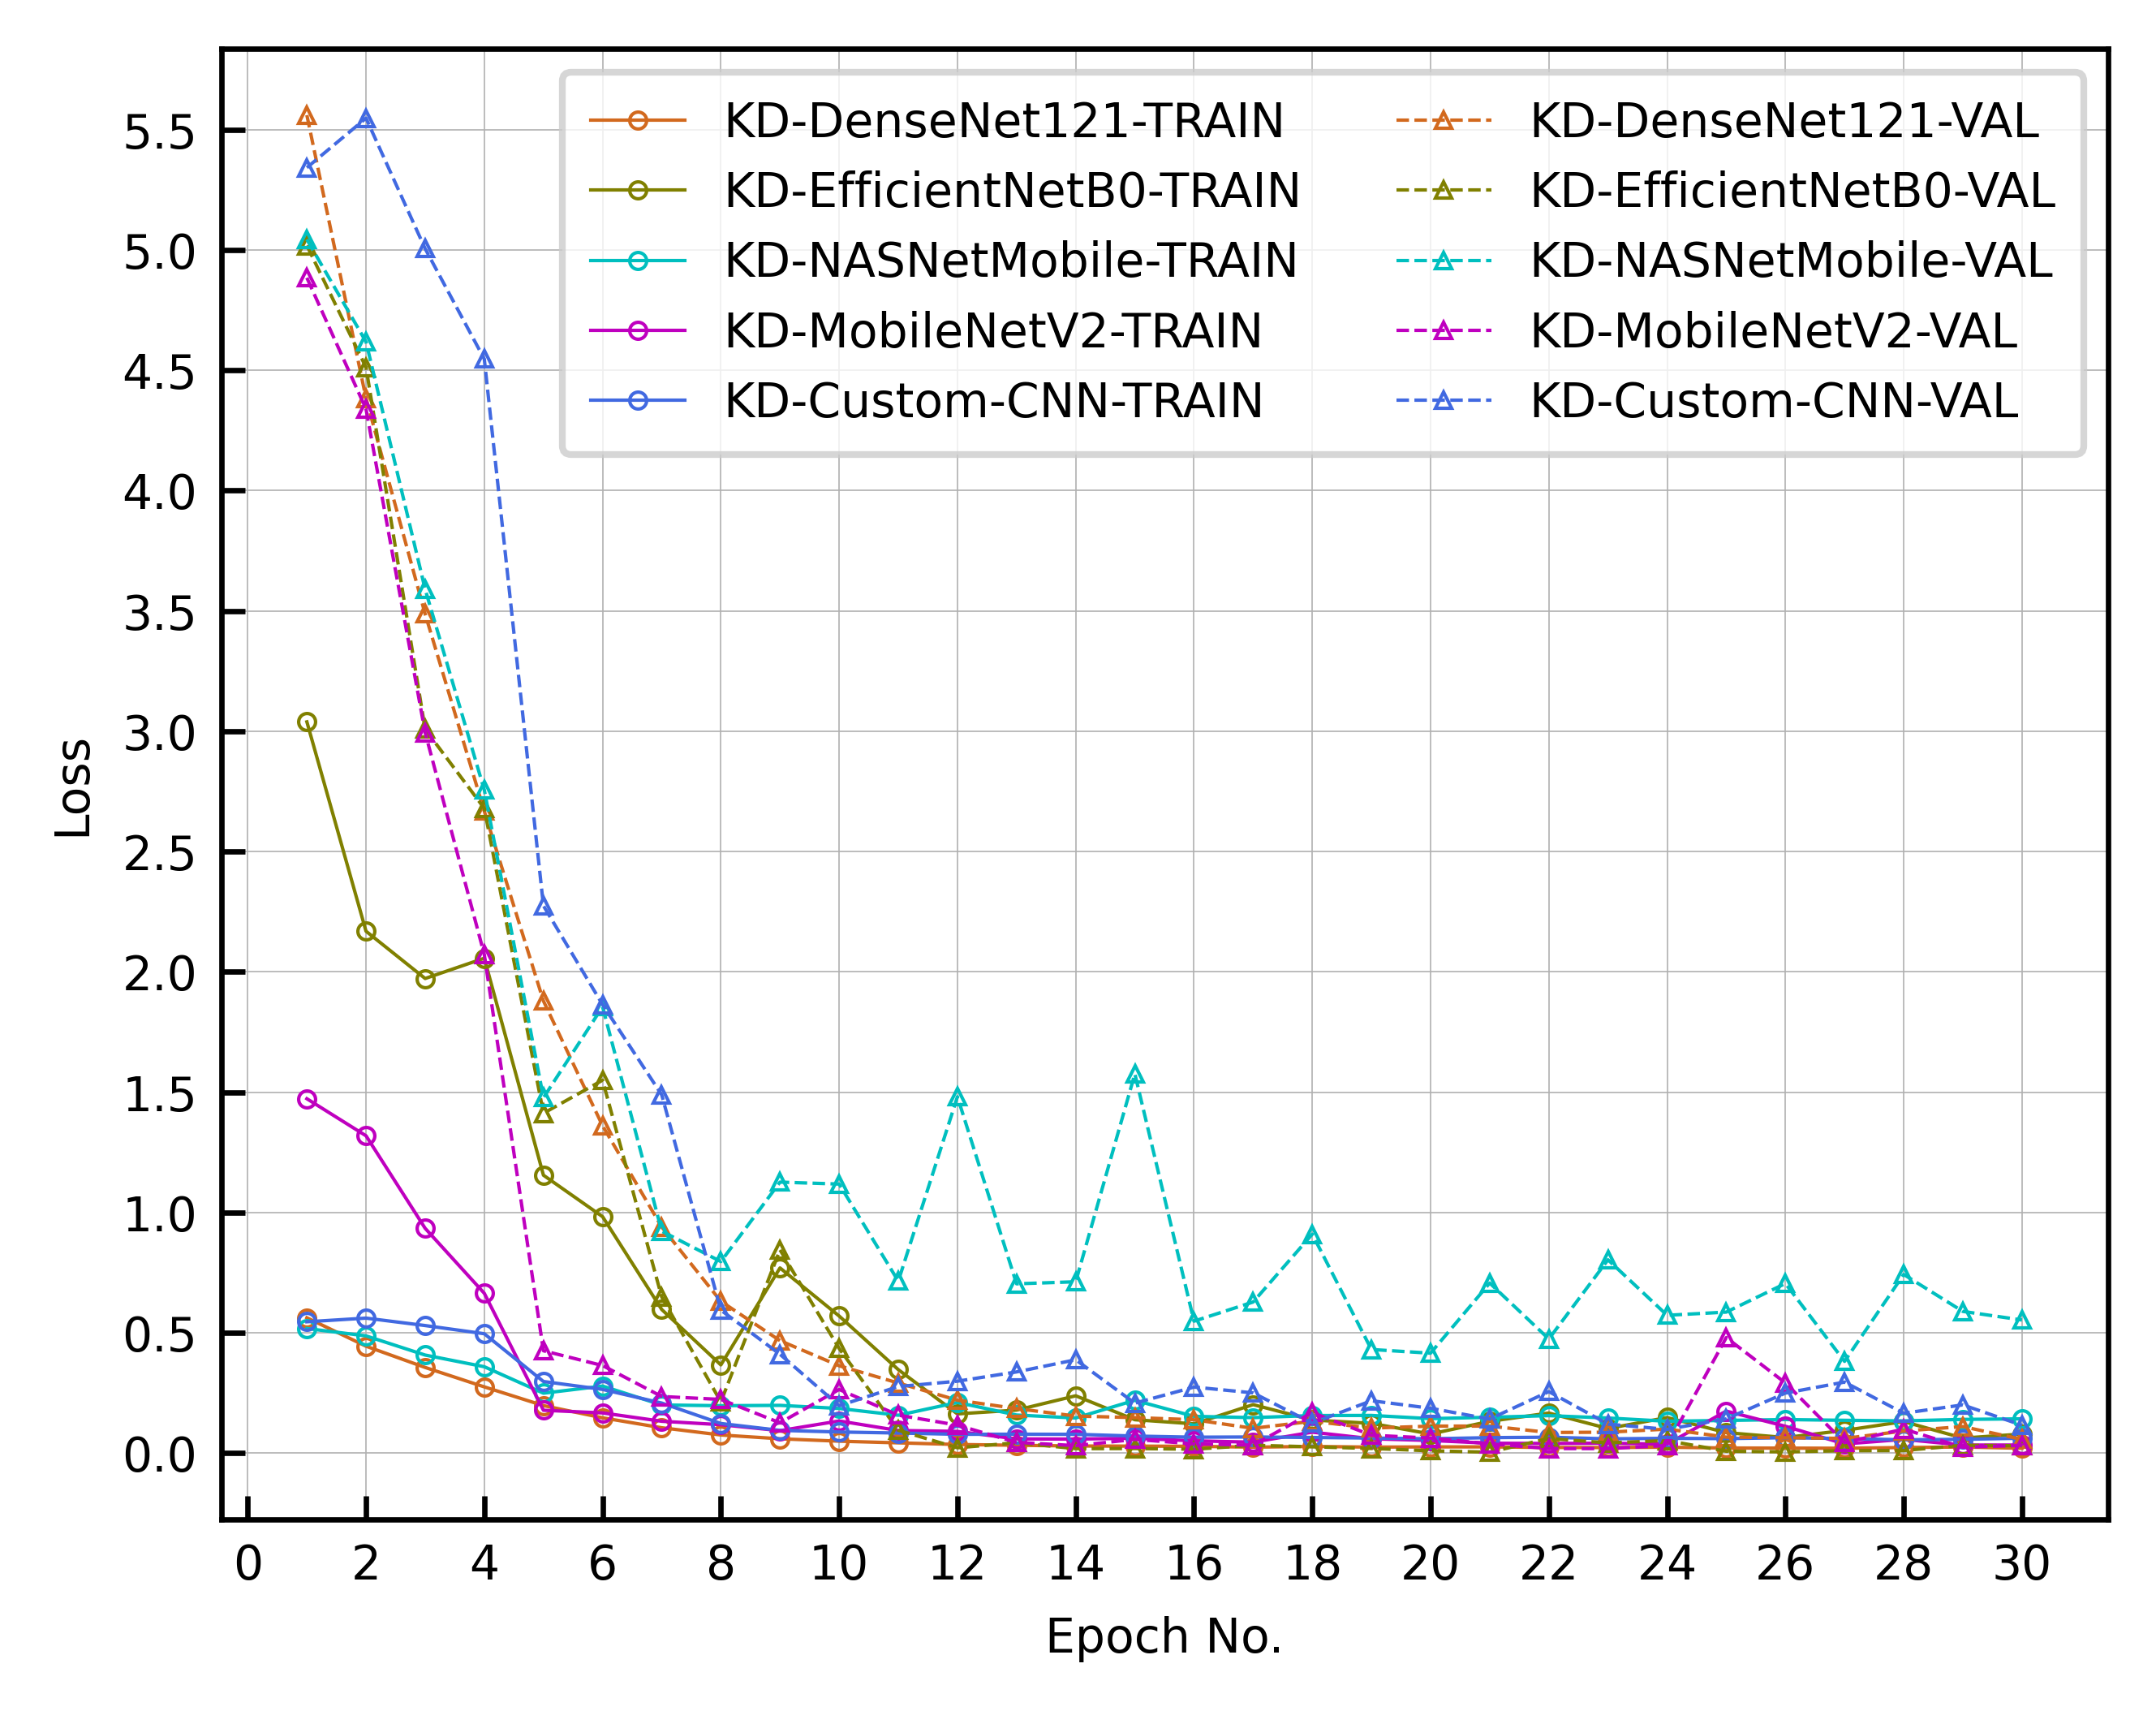

In [18]:
print("[INFO] LOSS CURVES FOR KD-STUDENTS")
plot_loss(DISTILLED_STUDENT_FILES, kd=True)

**Plot ROC Curves**

[INFO] ROC CURVES FOR KD-STUDENTS ON VALIDATION SET


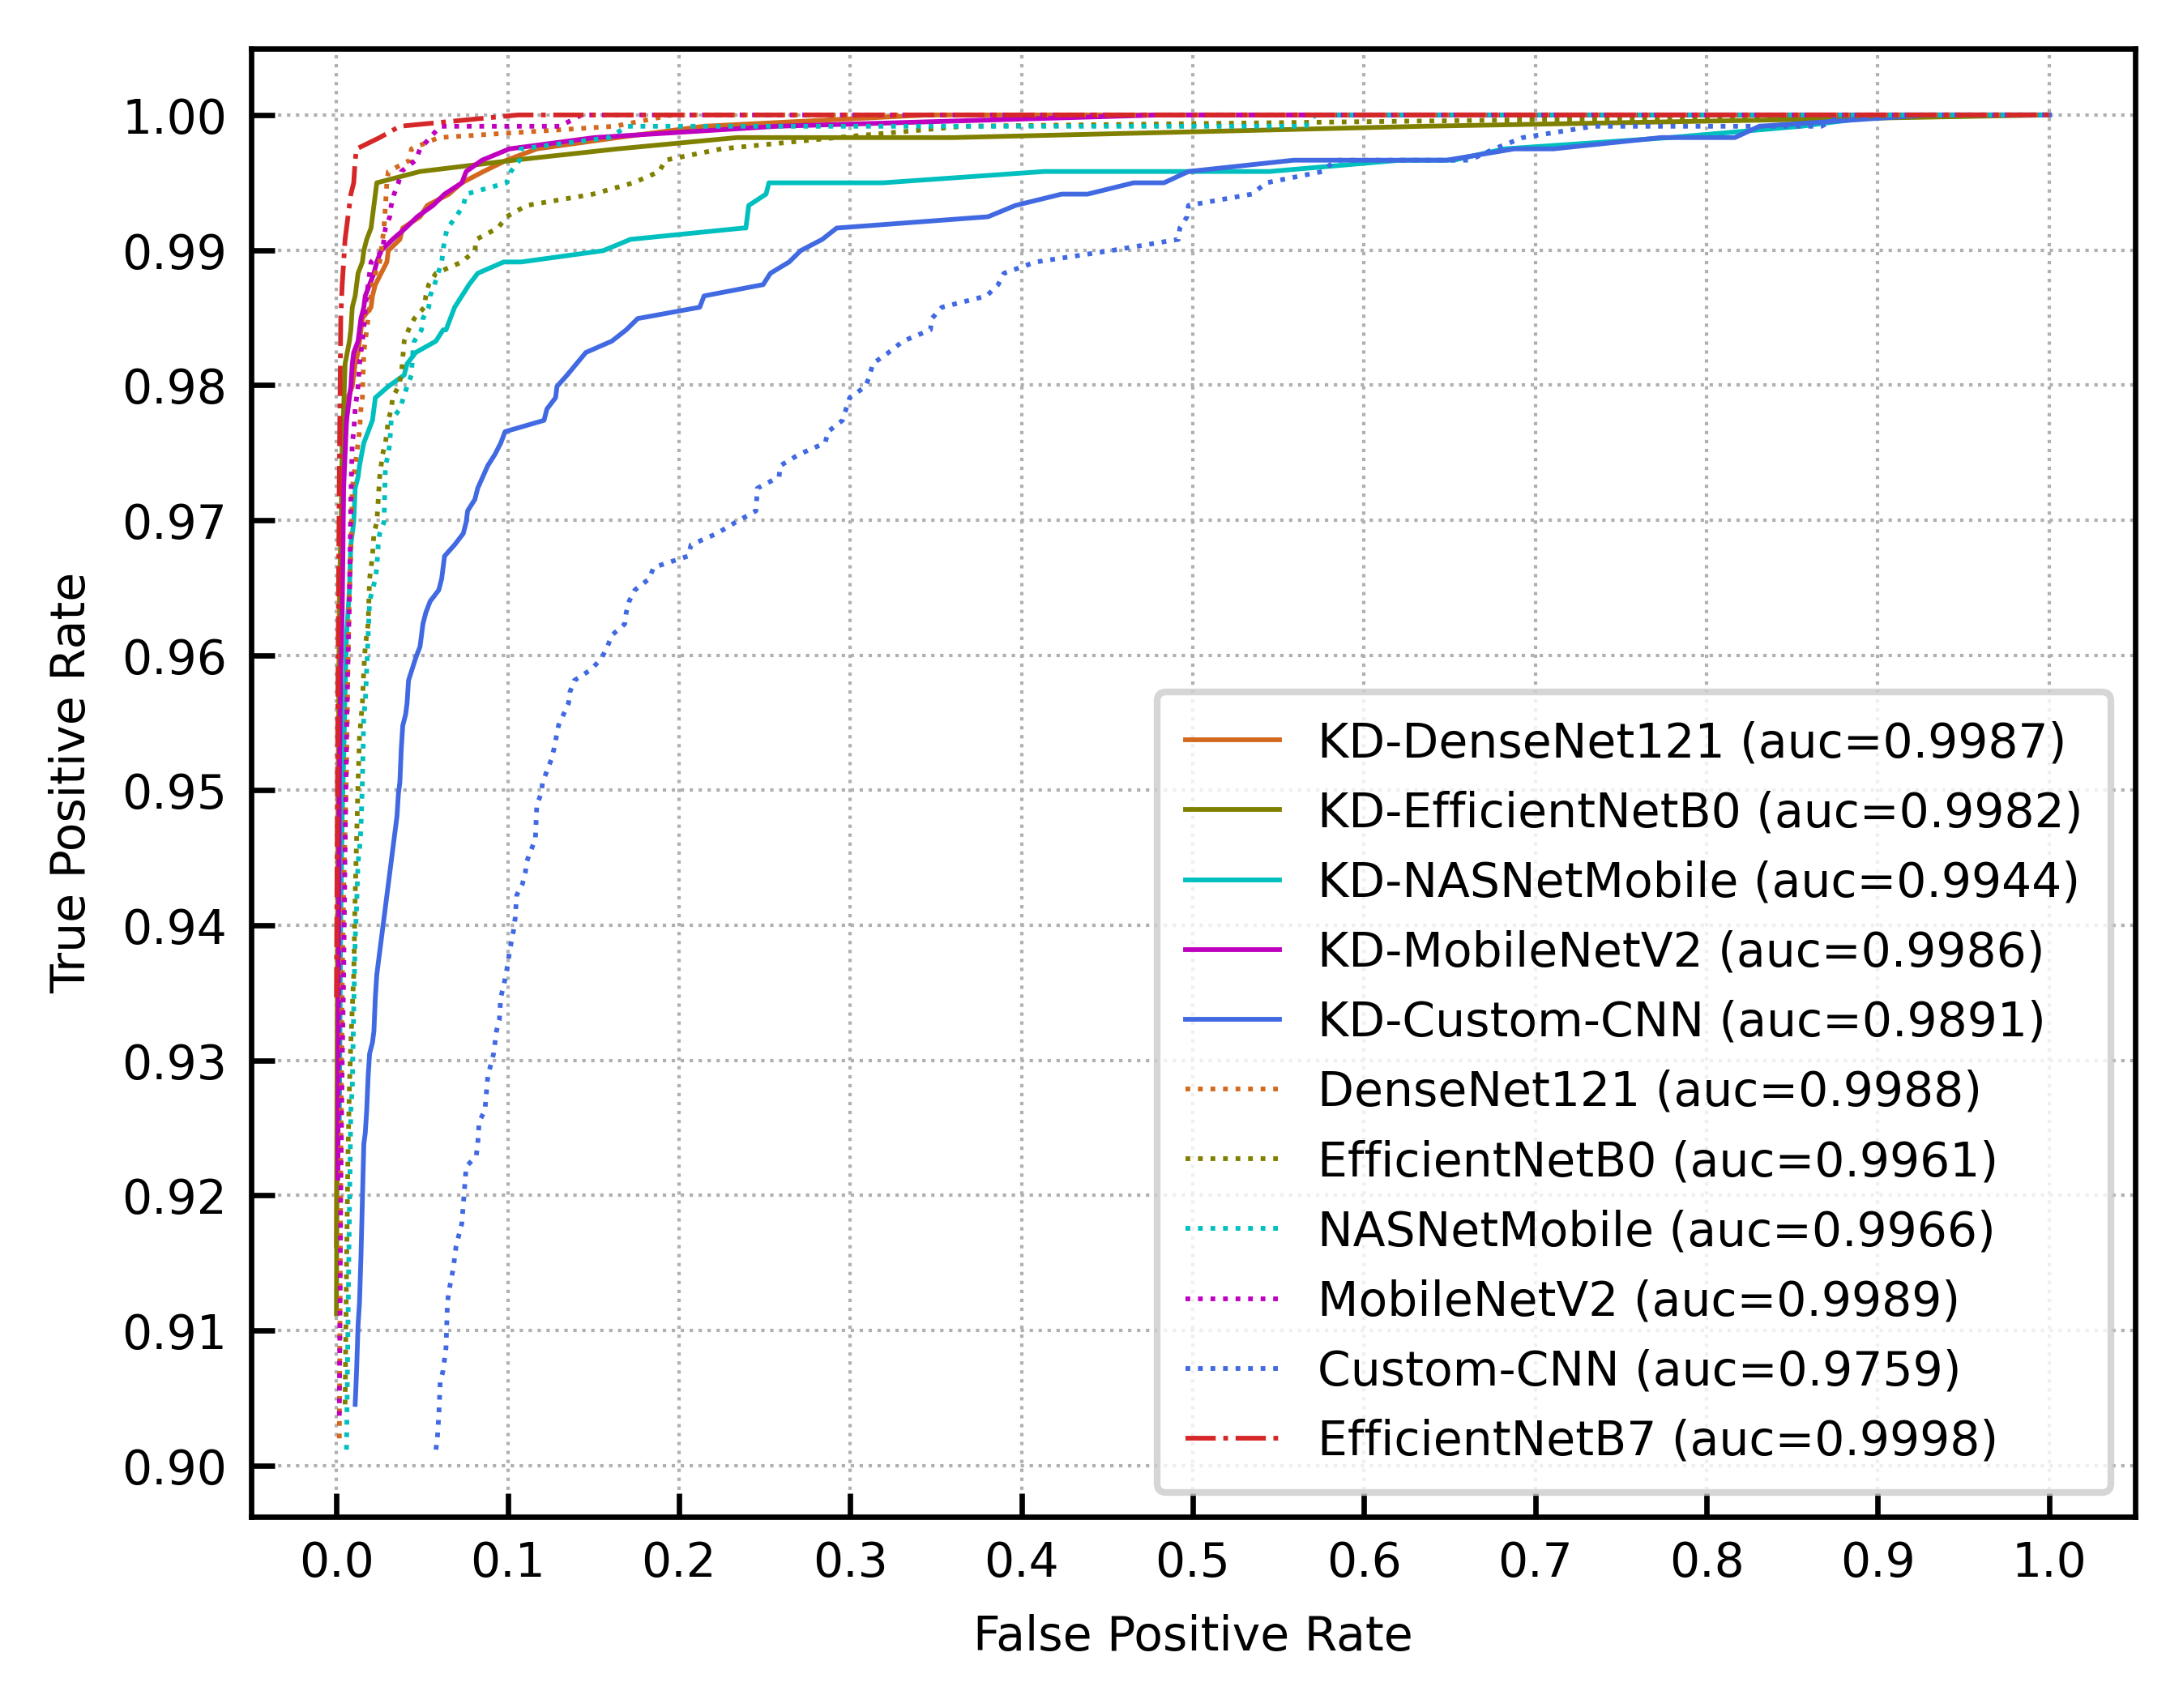

In [19]:
#On validation Set
print("[INFO] ROC CURVES FOR KD-STUDENTS ON VALIDATION SET")
plot_roc(PLOT_MODELS, kd=True)

[INFO] ROC CURVES FOR KD-STUDENTS ON TEST SET


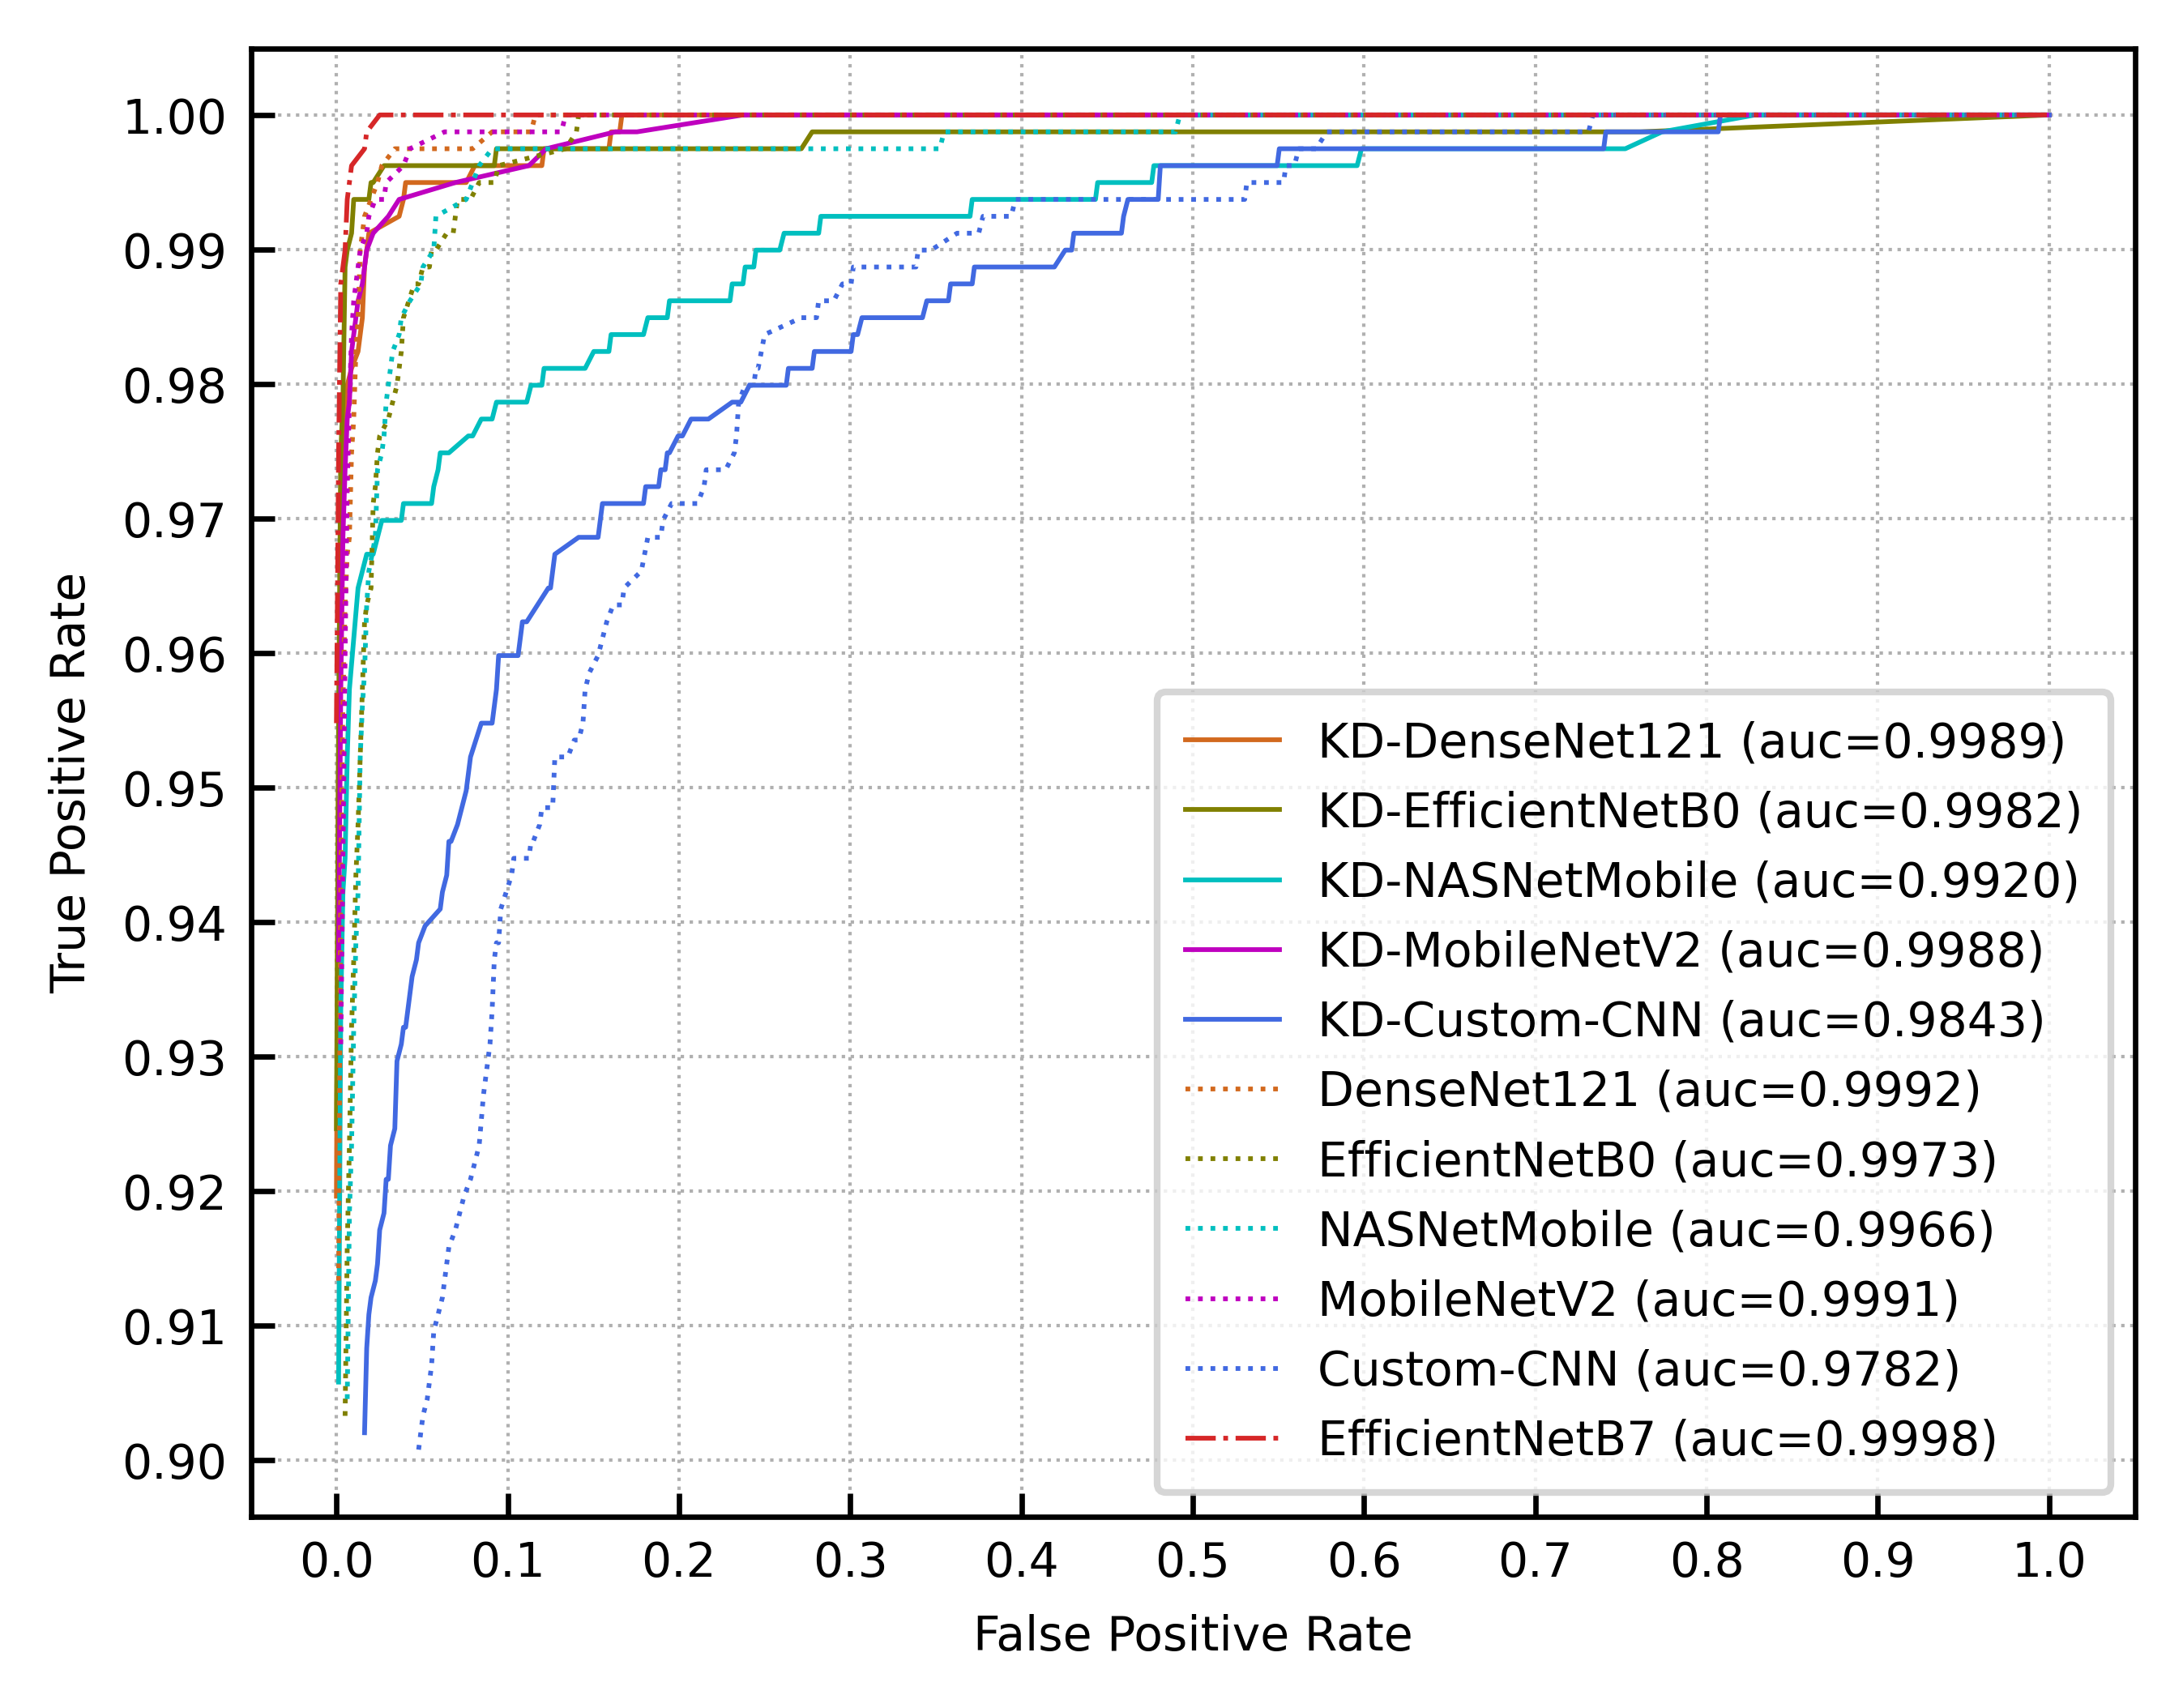

In [20]:
#On testing Set
print("[INFO] ROC CURVES FOR KD-STUDENTS ON TEST SET")
plot_roc(PLOT_MODELS, mode='TEST', kd=True)

**Plot PR Curves**

[INFO] PR CURVES FOR KD-STUDENTS ON VALIDATION SET


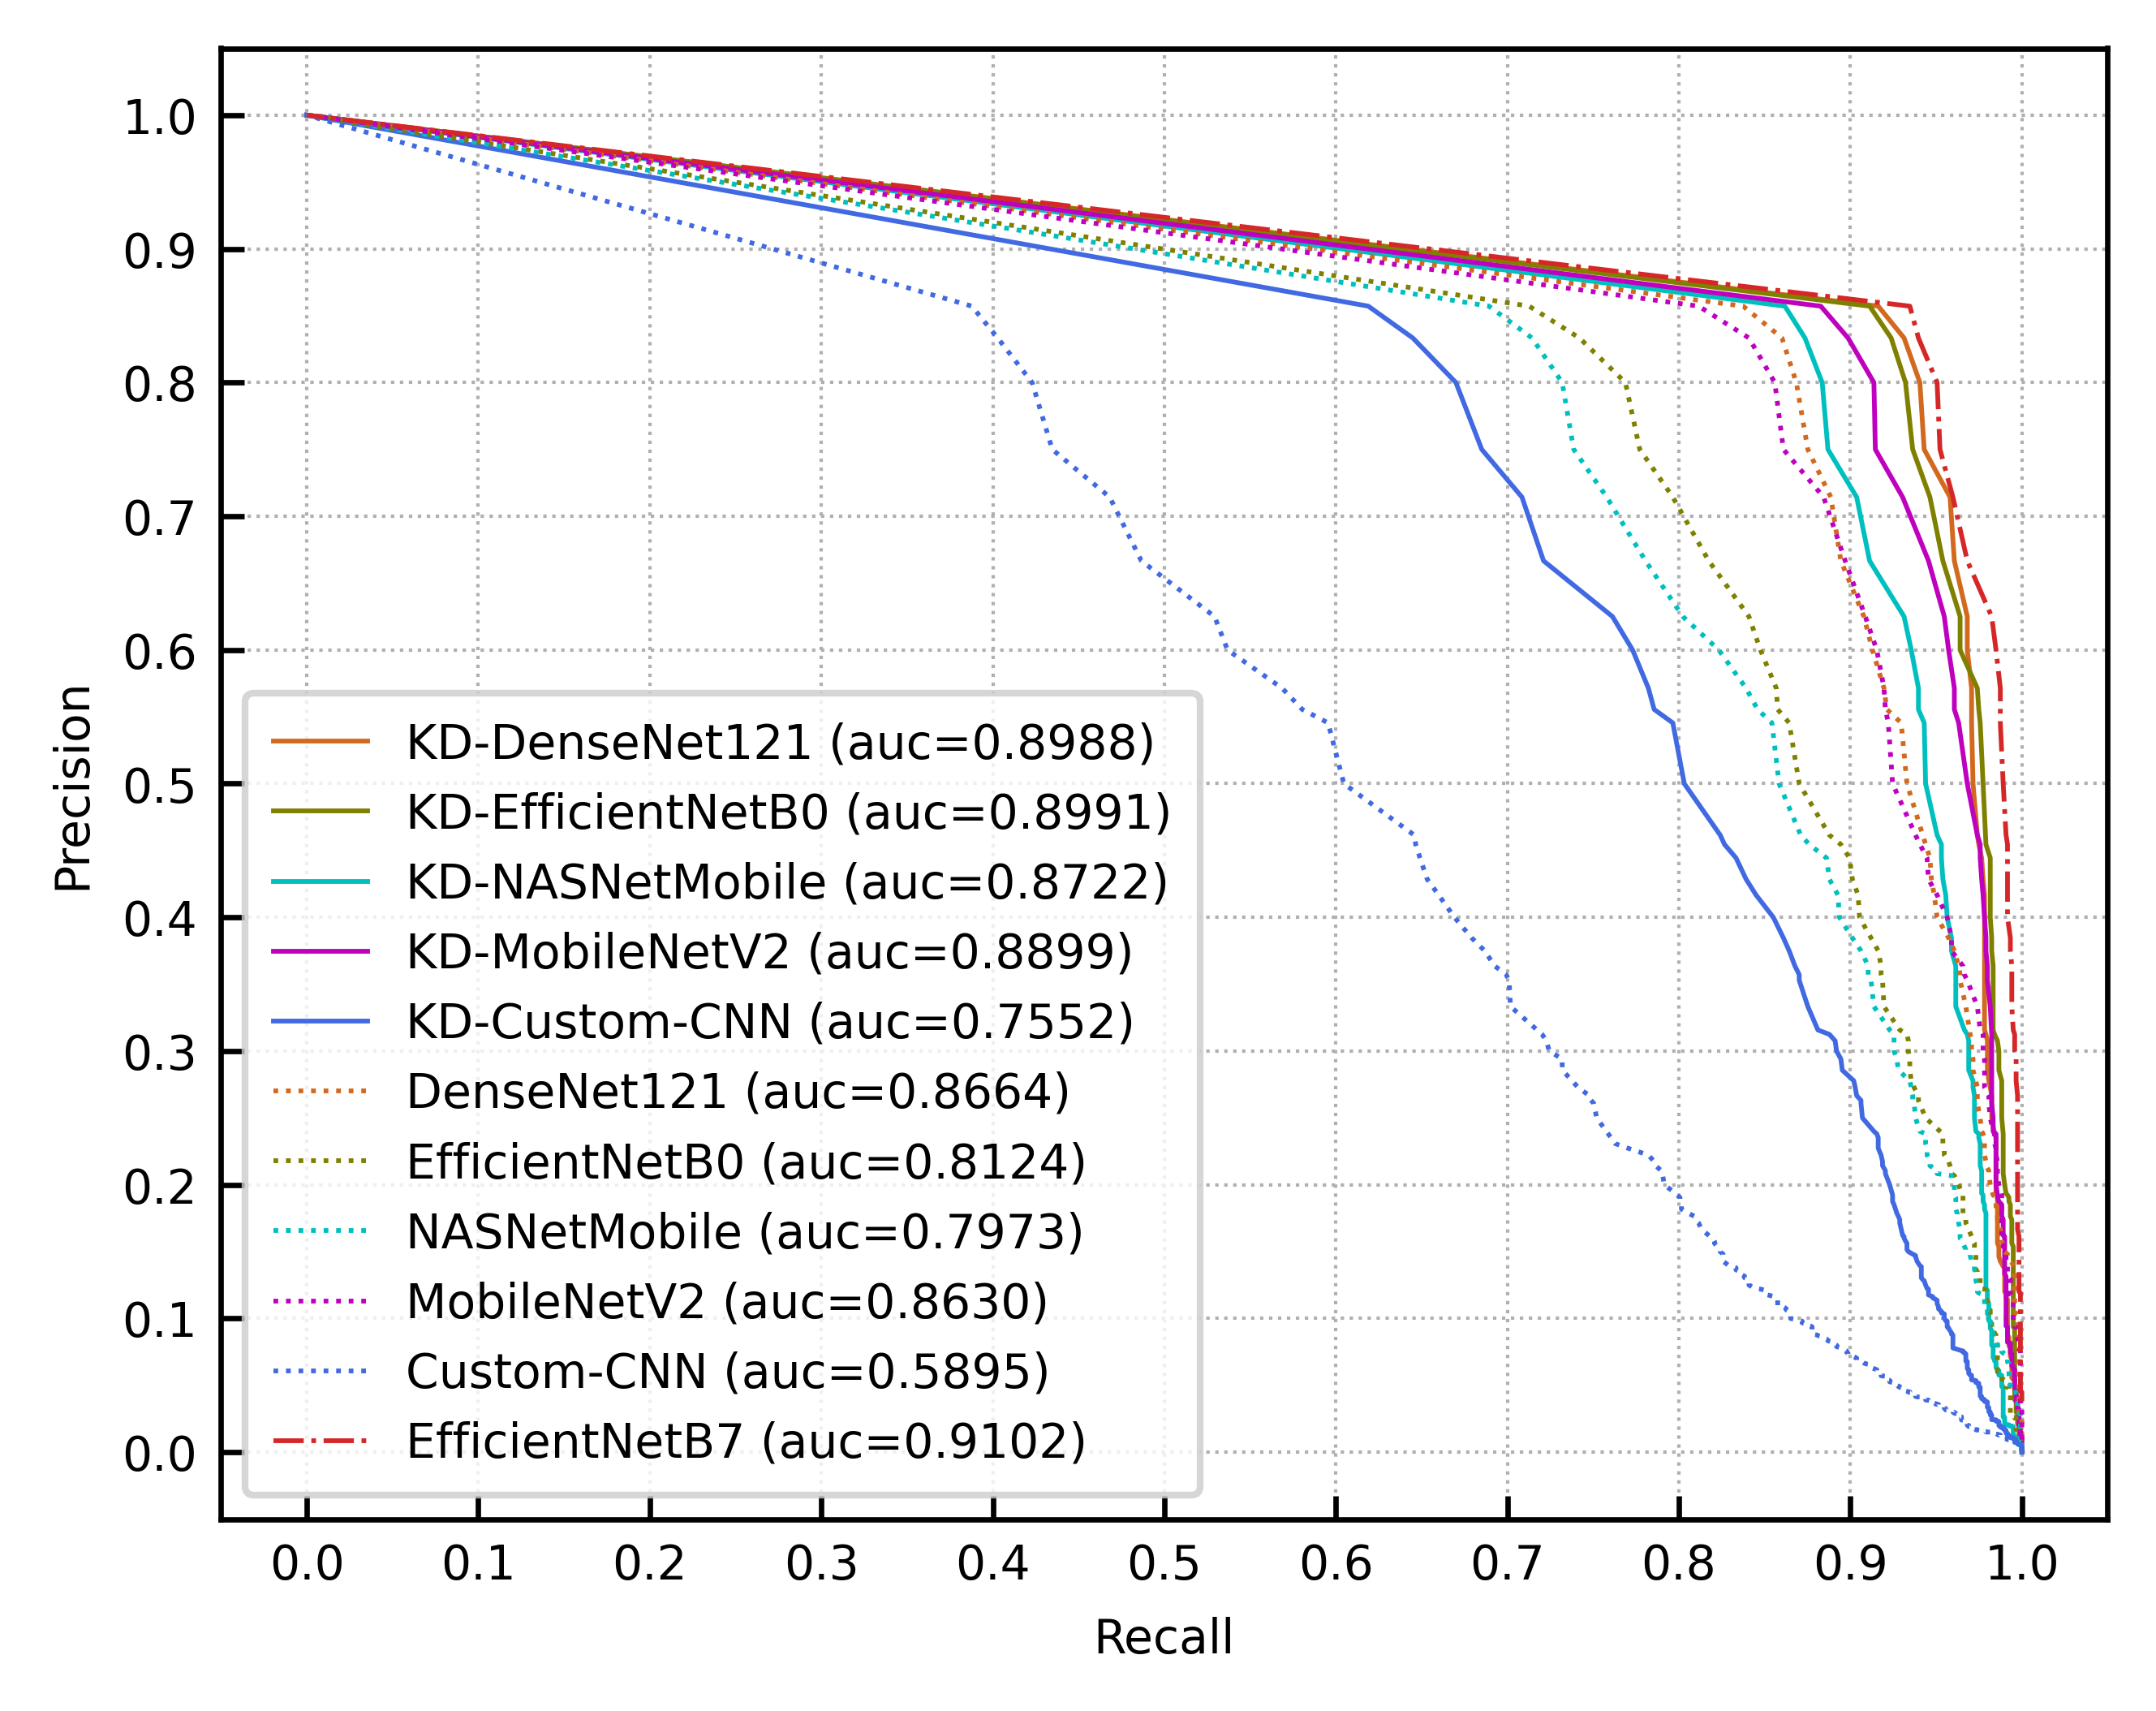

In [21]:
#On validation Set
print("[INFO] PR CURVES FOR KD-STUDENTS ON VALIDATION SET")
plot_pr(PLOT_MODELS, kd=True)

[INFO] PR CURVES FOR KD-STUDENTS ON TEST SET


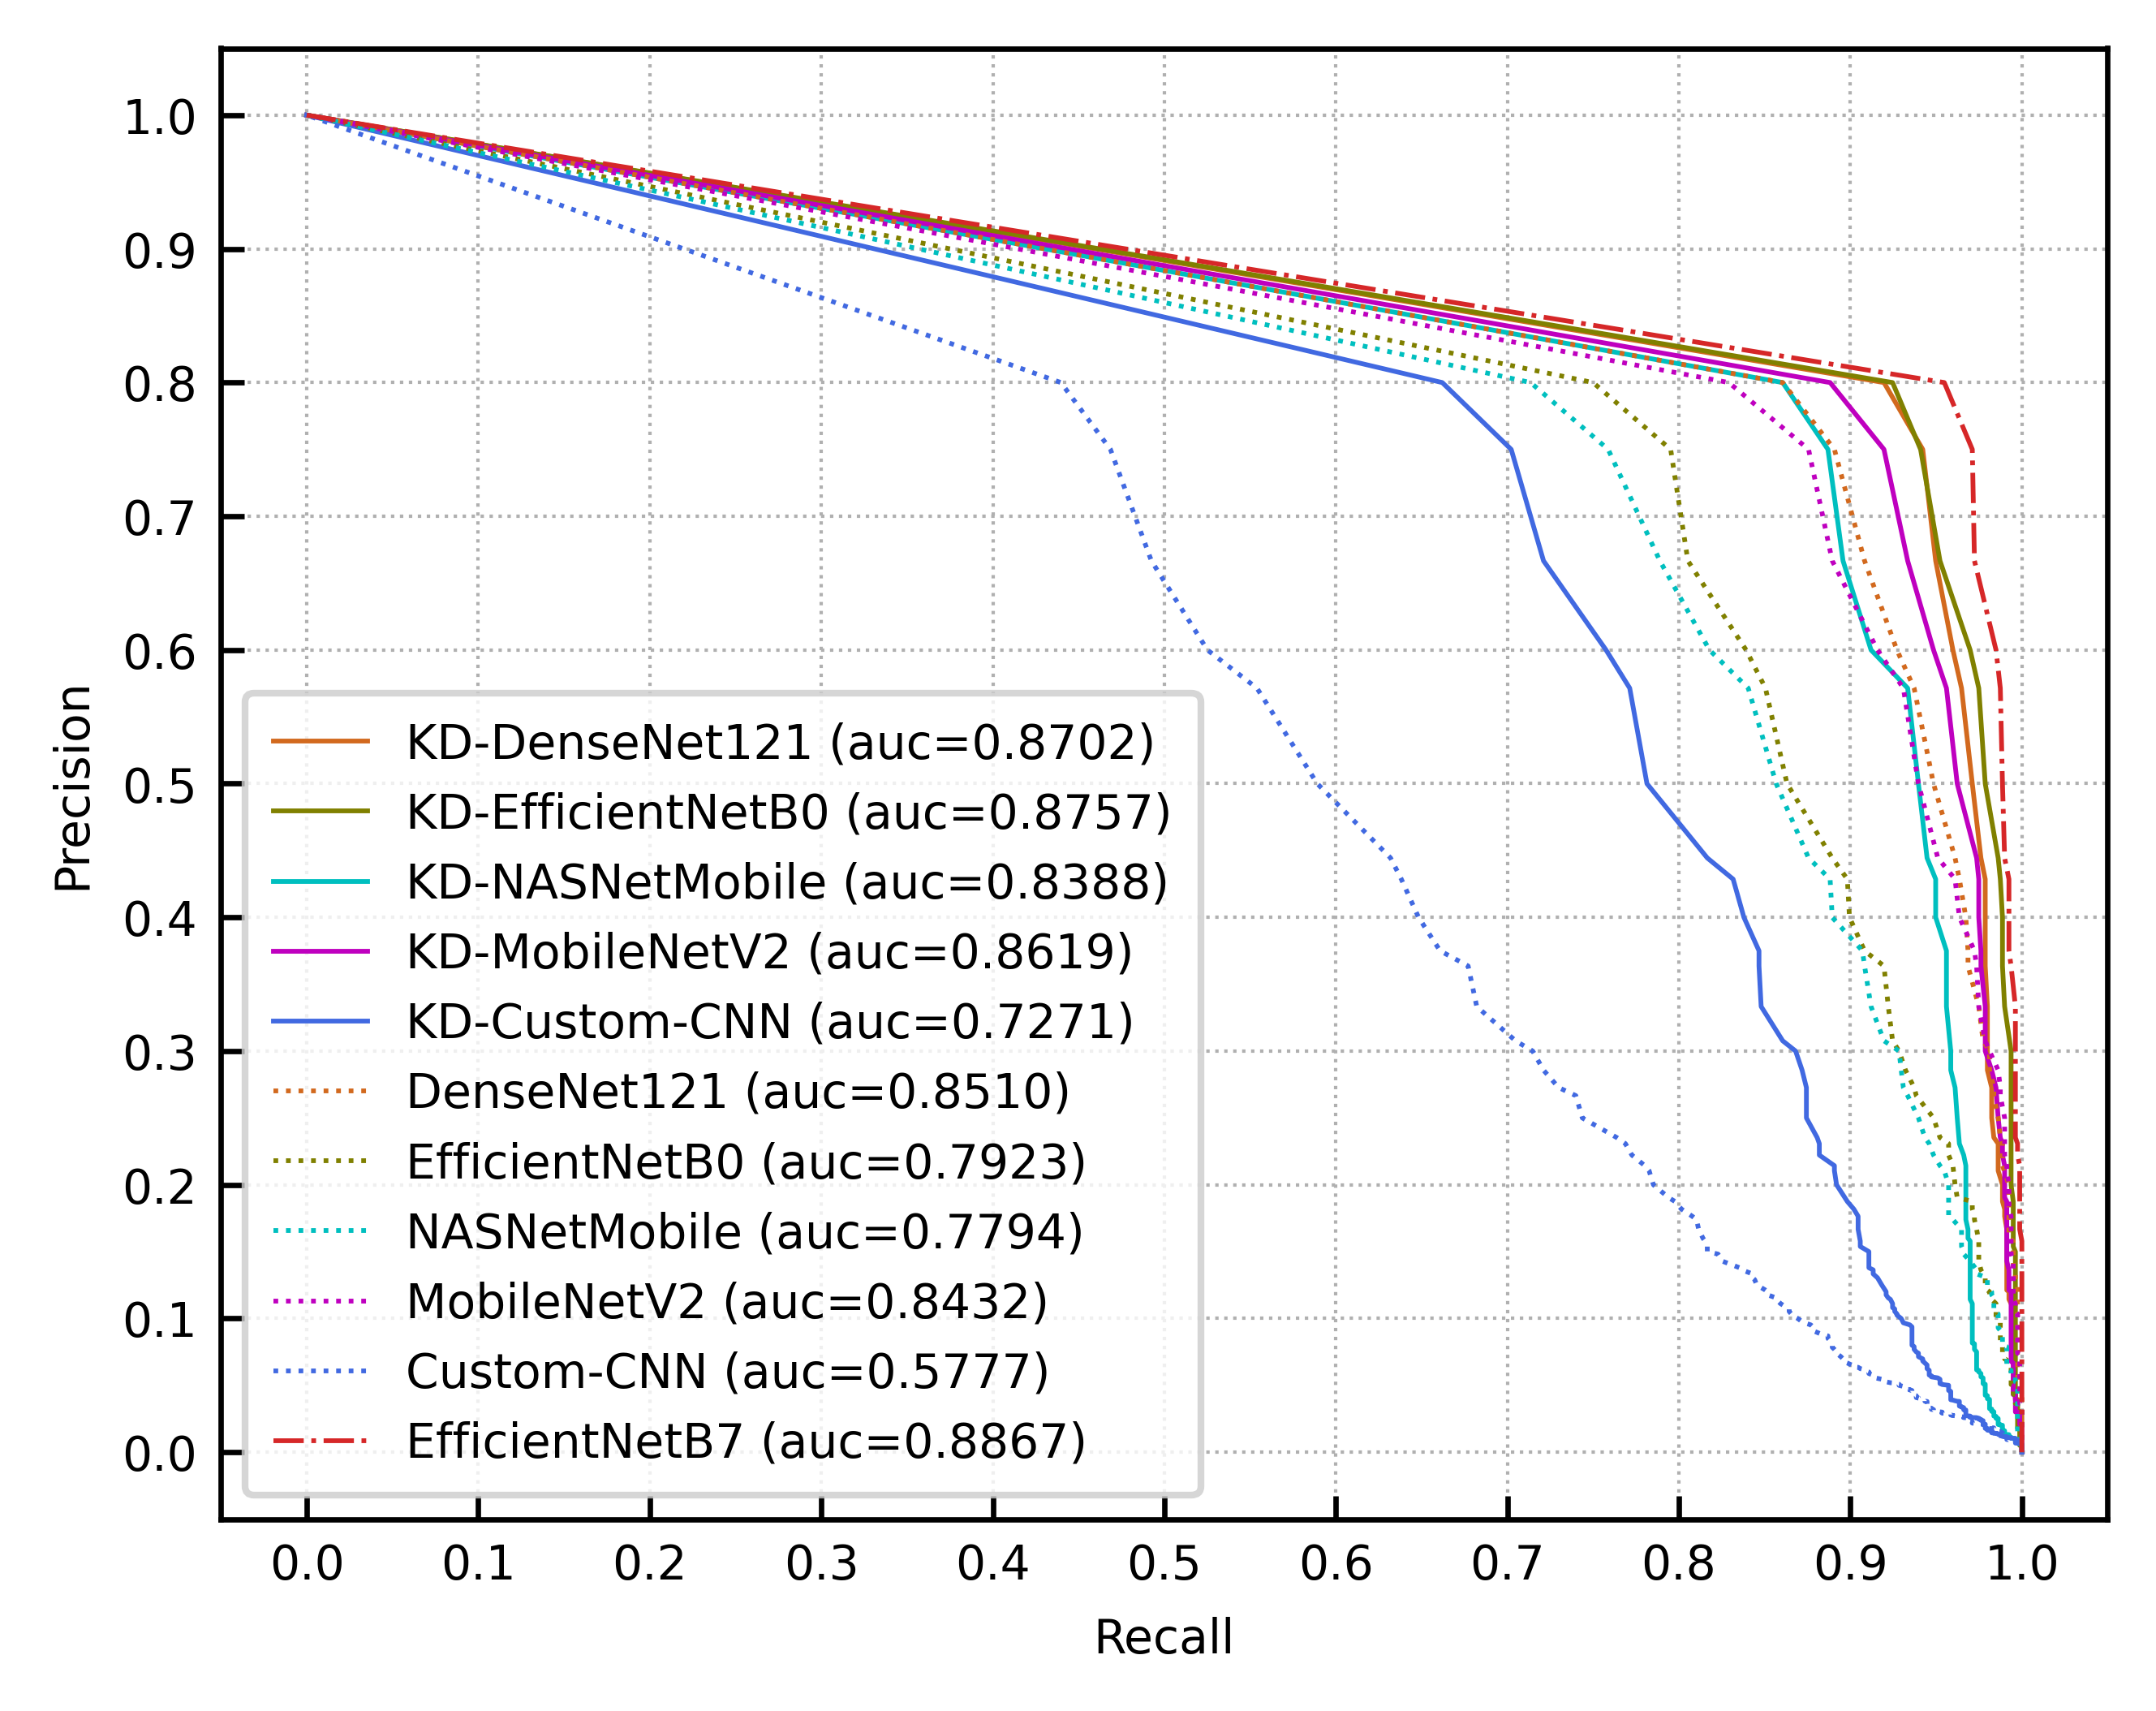

In [22]:
#On testing Set
print("[INFO] PR CURVES FOR KD-STUDENTS ON TEST SET")
plot_pr(PLOT_MODELS, mode='TEST', kd=True)

**Final Results - (Accuraccy vs FLOPS vs Parameters)** 

In [23]:
#On validation set
print("[INFO] CALCULATING FLOPs and Parameters")
fp1 = cal_param_flops(models, MODEL_FILES, val_results)

[INFO] CALCULATING FLOPs and Parameters
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


[INFO] FINAL RESULTS COMPARISON CHART ON VALIDATION SET


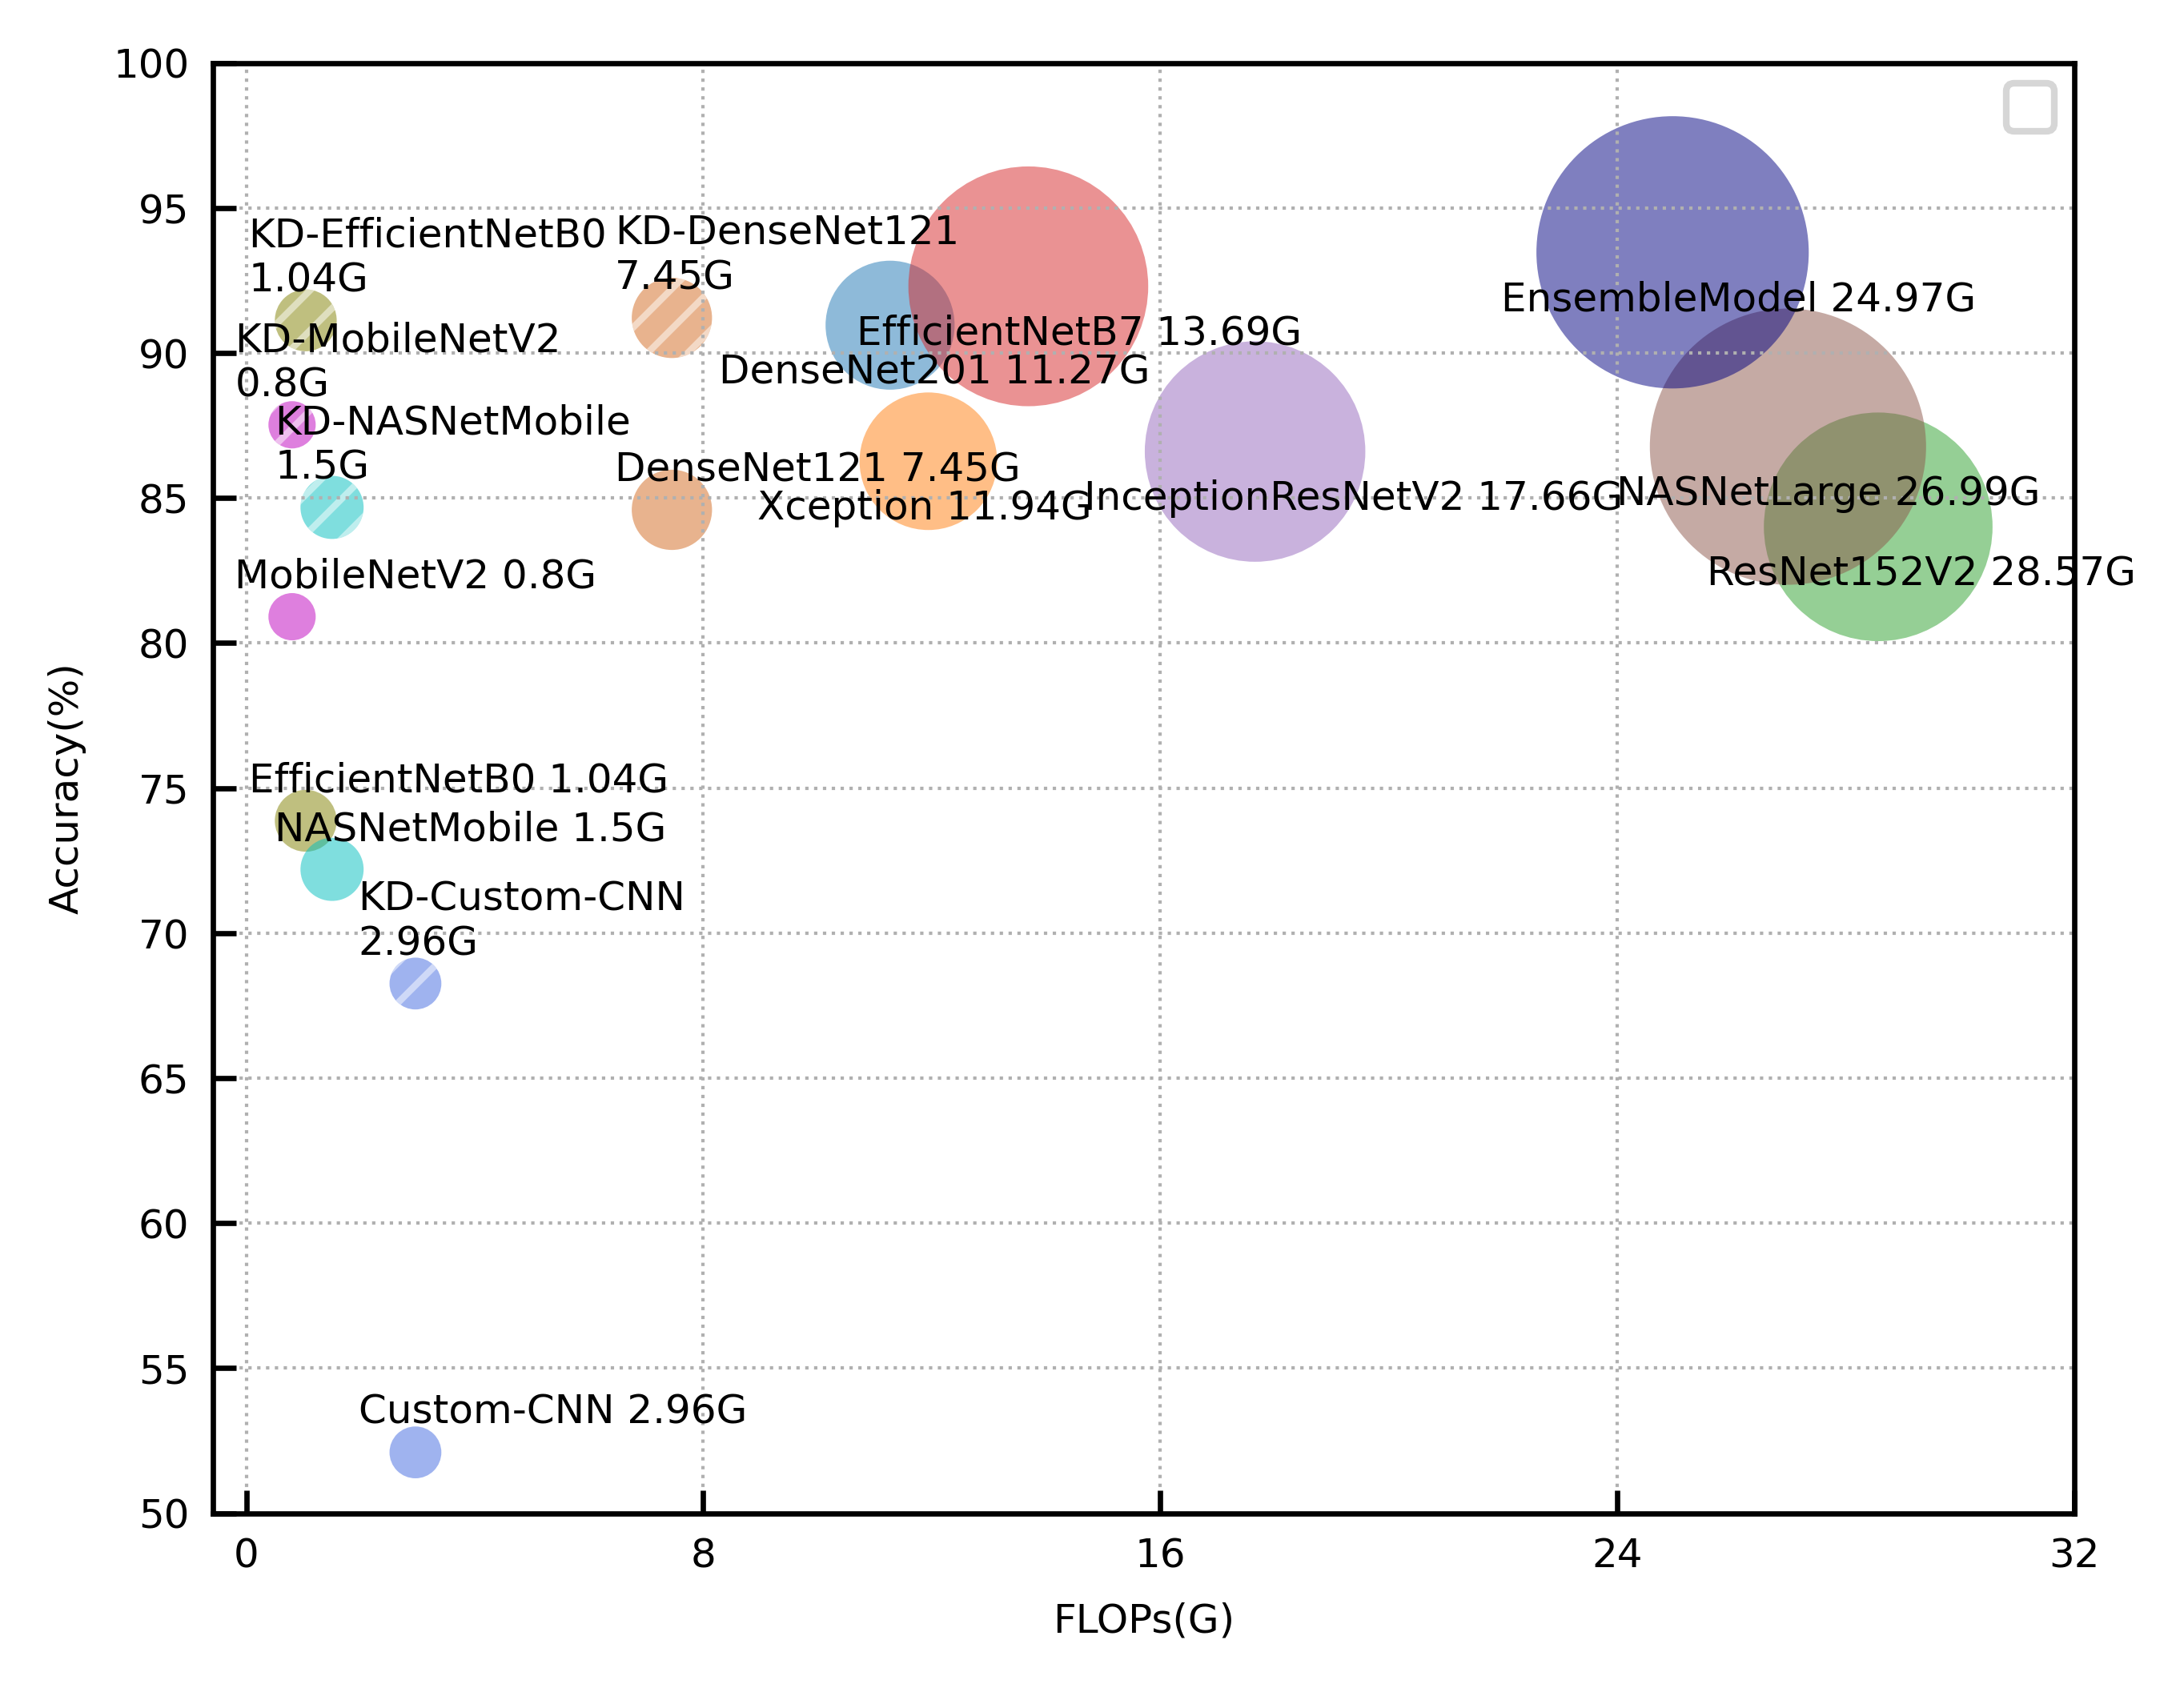

In [24]:
print("[INFO] FINAL RESULTS COMPARISON CHART ON VALIDATION SET")
plot_bubble(MODEL_FILES, fp1)

In [25]:
#On testing set
print("[INFO] CALCULATING FLOPs and Parameters")
fp2 = cal_param_flops(models, MODEL_FILES, test_results)

[INFO] CALCULATING FLOPs and Parameters


[INFO] FINAL RESULTS COMPARISON CHART ON TEST SET


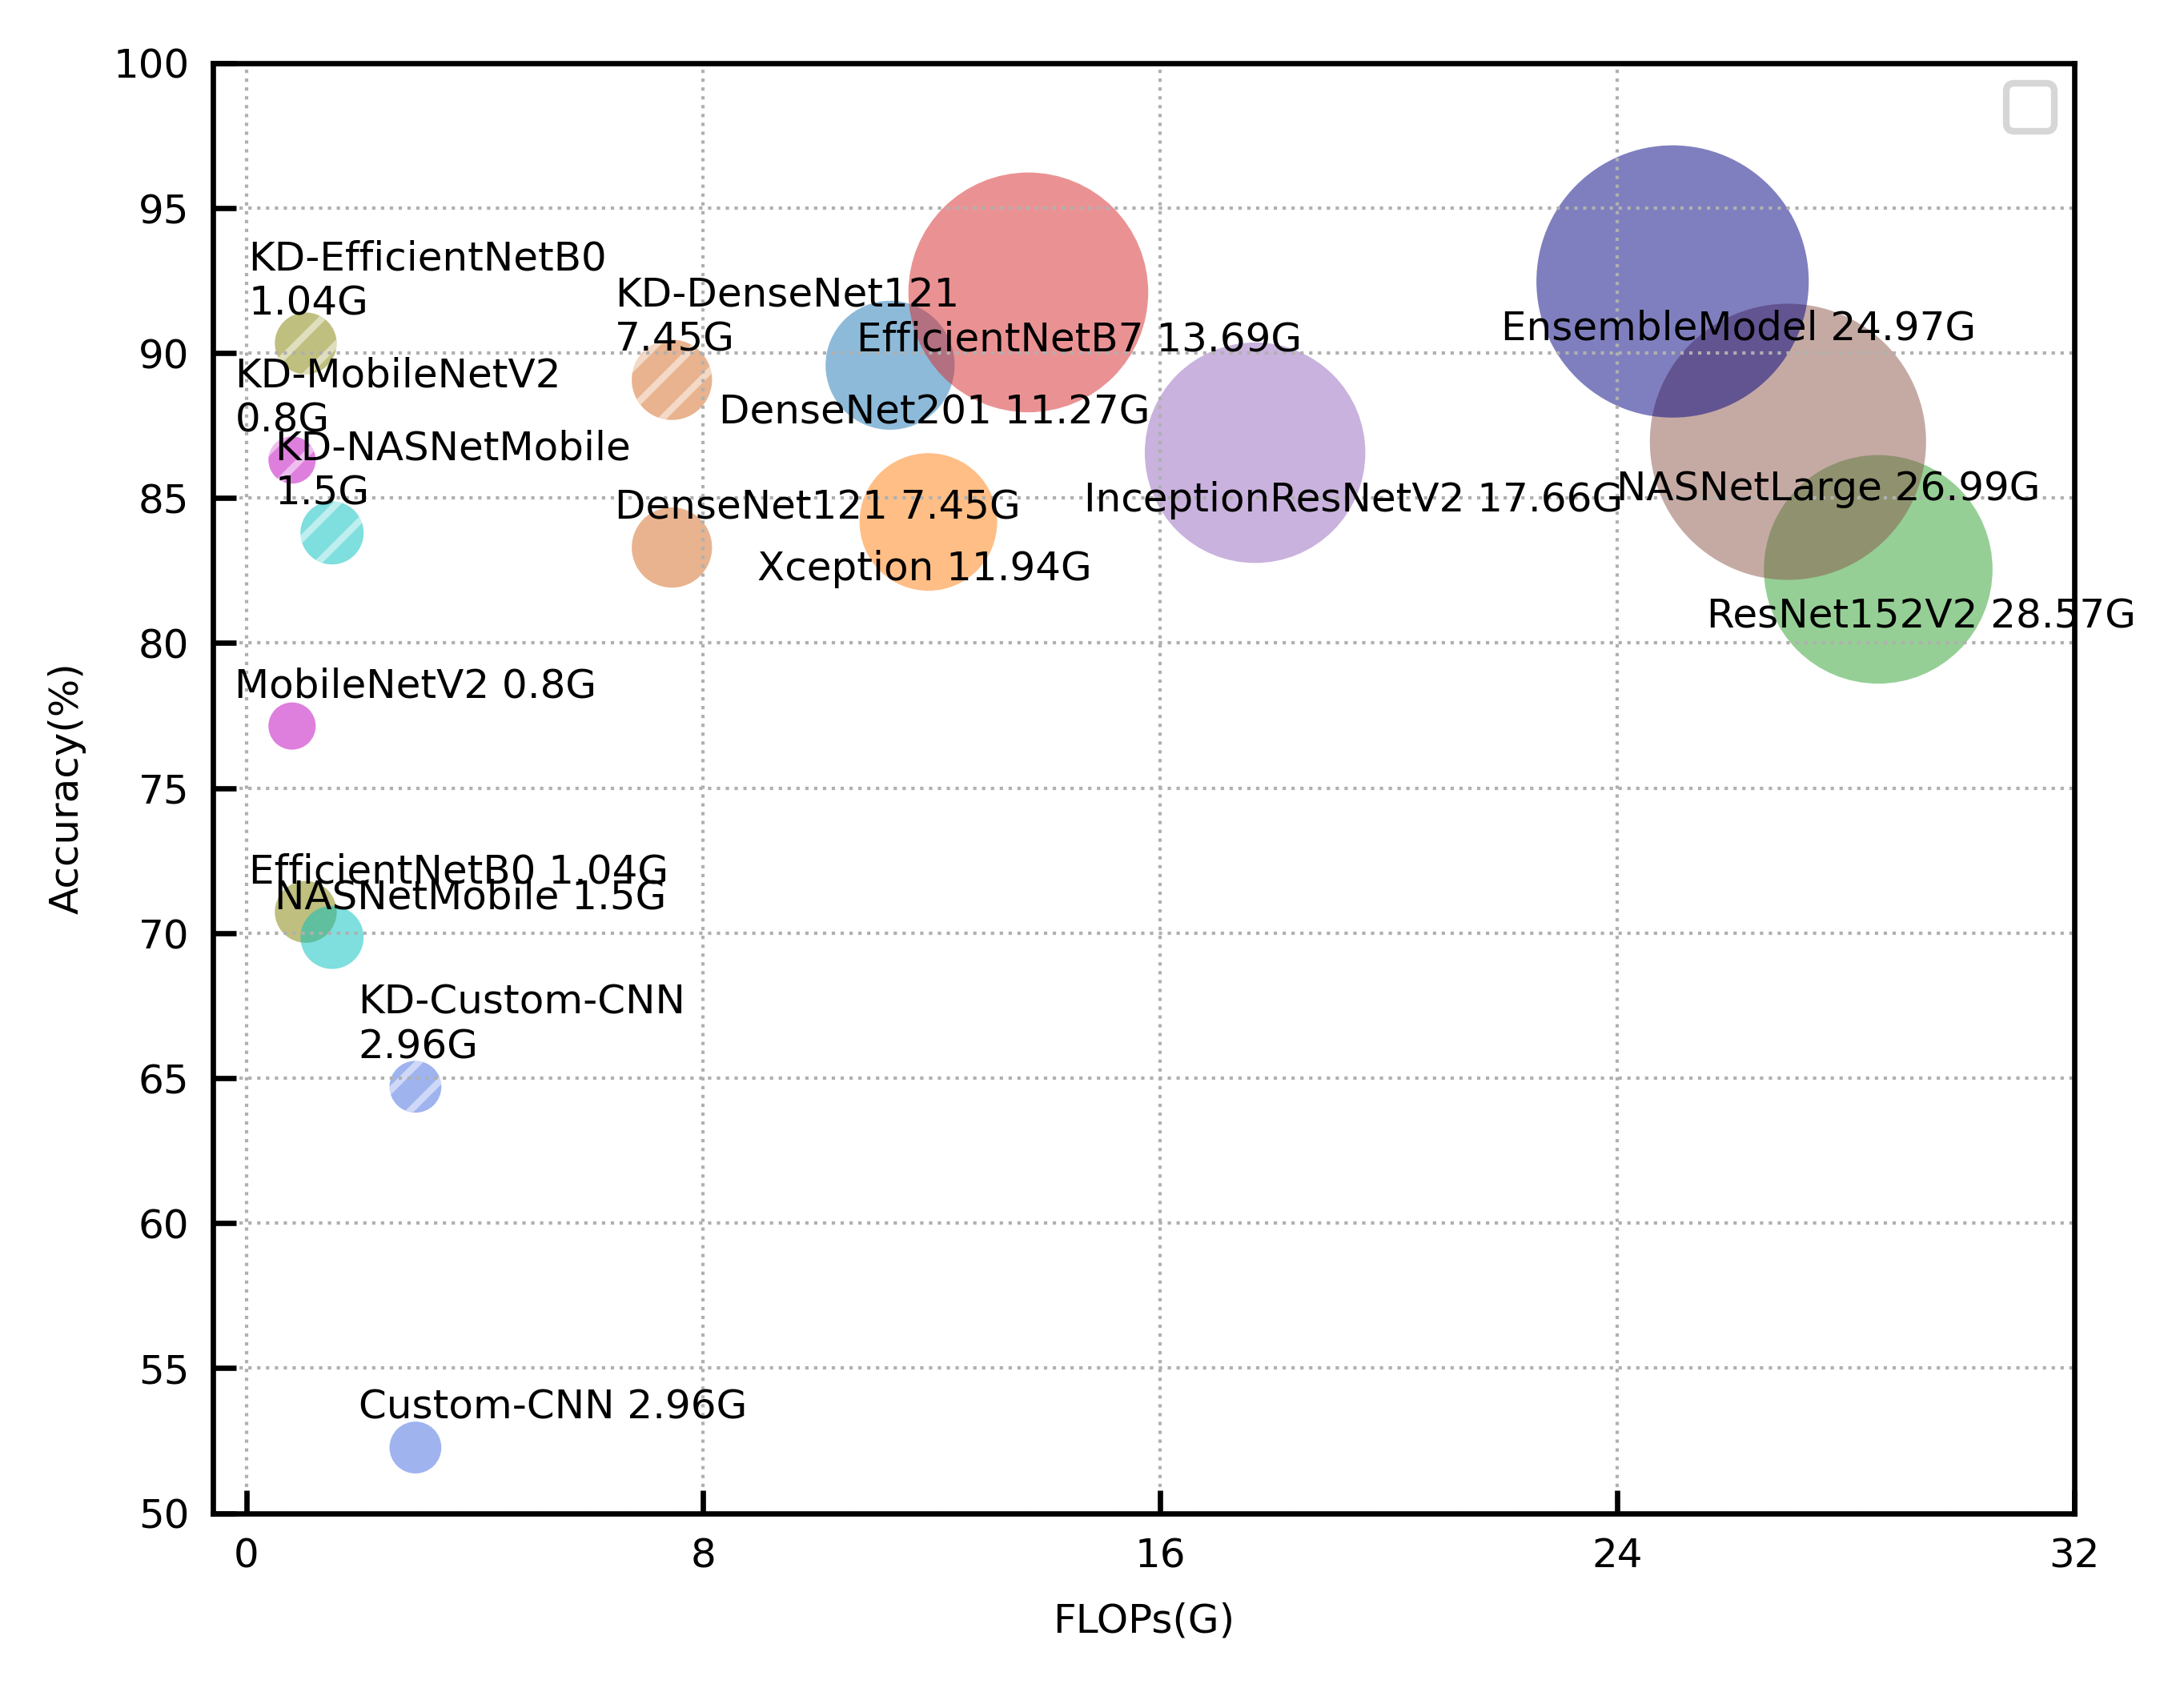

In [26]:
print("[INFO] FINAL RESULTS COMPARISON CHART ON TEST SET")
plot_bubble(MODEL_FILES, fp2, mode='TEST')

**Confusion Matrix**

In [27]:
#On validation set
print("[INFO] CONFUSION MATRIX HEATMAP ON VALIDATION SET")
for i,file in enumerate(DISTILLED_STUDENT_FILES):
    print(str(i+1) + ': ' + file)
    plot_confusion(file)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#On testing set
print("[INFO] CONFUSION MATRIX HEATMAP ON TEST SET")
for i,file in enumerate(DISTILLED_STUDENT_FILES):
    print(str(i+1) + ': ' + file)
    plot_confusion(file, mode='TEST')

Output hidden; open in https://colab.research.google.com to view.